<h1><center> Data mining and Big data analytics</center></h1>

<h1><center> Classification non supervisée</center></h1>

On dispose de 2000 images décrites par 6 ensembles d’indicateurs (coefficients de Fourier,
profil de corrélations, coefficients de Karhunen-Love, valeurs des pixels moyennés, moments
de Zernike, morphologie). Chacune de ces images représente un chiffre manuscrit.

## Travail à faire: Faire une étude exploratoire

In [487]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## IMPORTATION  ET EXPLORATION DES DONNEES

### Profil de corrélations

In [581]:
mfeat_fac = pd.read_csv('mfeat-fac', sep="\s+", header=None)
mfeat_fac.columns= ['Fa_'+str(i) for i in range(mfeat_fac.shape[1])]

In [582]:
mfeat_fac

,Fa_0,Fa_1,Fa_2,Fa_3,Fa_4,Fa_5,Fa_6,Fa_7,Fa_8,Fa_9,...,Fa_206,Fa_207,Fa_208,Fa_209,Fa_210,Fa_211,Fa_212,Fa_213,Fa_214,Fa_215
0,98,236,531,673,607,647,2,9,3,6,...,474,536,628,632,18,36,8,15,12,13
1,121,193,607,611,585,665,7,9,2,4,...,520,458,570,634,15,32,11,13,15,11
2,115,141,590,605,557,627,12,6,3,3,...,535,498,572,656,20,35,16,14,13,6
3,90,122,627,692,607,642,0,6,4,5,...,576,549,628,621,16,35,7,12,15,9
4,157,167,681,666,587,666,8,6,1,4,...,594,525,568,653,16,35,10,15,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,304,242,927,626,564,674,25,17,0,7,...,912,507,577,757,15,24,11,14,10,18
1996,324,330,919,713,609,693,28,16,8,9,...,898,554,620,632,12,25,11,10,12,17
1997,337,299,852,724,581,660,22,14,10,10,...,841,579,590,681,18,27,13,15,17,21
1998,247,261,866,633,565,615,24,15,2,4,...,839,498,556,706,16,26,13,13,15,15


In [583]:
#Taille des données
mfeat_fac.shape

(2000, 216)

In [584]:
# Description des données
mfeat_fac.describe().T

,count,mean,std,min,25%,50%,75%,max
Fa_0,2000.0,272.0515,91.275454,67.0,208.00,274.5,338.0,515.0
Fa_1,2000.0,322.7255,109.426588,81.0,247.00,324.0,406.0,565.0
Fa_2,2000.0,774.8245,140.141570,500.0,656.75,766.0,879.0,1264.0
Fa_3,2000.0,754.3390,109.173768,543.0,667.00,736.0,830.0,1134.0
Fa_4,2000.0,640.4605,48.940117,437.0,607.00,636.5,667.0,823.0
...,...,...,...,...,...,...,...,...
Fa_211,2000.0,21.5840,7.982343,1.0,16.00,23.0,27.0,38.0
Fa_212,2000.0,17.6120,5.884451,1.0,13.00,18.0,21.0,36.0
Fa_213,2000.0,11.9680,2.579788,4.0,10.00,12.0,14.0,18.0
Fa_214,2000.0,13.7045,1.985485,5.0,12.00,14.0,15.0,19.0


>* Nous constatons que les variances (std eleve au carre) sont differentes, les unes tres grandes que les autres. Nous allons appliquer pour ces donnes de l'ACP normée. 

In [492]:
# verification des valeurs manquantes
mfeat_fac.isnull().sum().sum()

0

>* les données ne contiennent pas de valeur manquantes.

### Coefficients de Fourier

In [585]:
mfeat_fou = pd.read_csv('mfeat-fou', sep="\s+", header=None)
mfeat_fou.columns= ["Fo_"+str(i) for i in range(mfeat_fou.shape[1])]
mfeat_fou

,Fo_0,Fo_1,Fo_2,Fo_3,Fo_4,Fo_5,Fo_6,Fo_7,Fo_8,Fo_9,...,Fo_66,Fo_67,Fo_68,Fo_69,Fo_70,Fo_71,Fo_72,Fo_73,Fo_74,Fo_75
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,...,0.123448,0.113374,0.074343,0.281666,0.067795,0.344182,0.038963,0.394366,0.049971,0.344871
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,...,0.045310,0.069337,0.045386,0.254264,0.045447,0.335659,0.021719,0.445277,0.083978,0.354092
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,...,0.019858,0.218842,0.041087,0.360464,0.047154,0.377408,0.052099,0.445029,0.071234,0.261465
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,...,0.083995,0.085479,0.087658,0.151880,0.075950,0.293462,0.022675,0.408291,0.063010,0.401376
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,...,0.021004,0.106960,0.032283,0.248565,0.015674,0.386276,0.039481,0.434701,0.069218,0.405403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.171874,0.221525,0.426470,0.077220,0.264413,0.220274,0.452574,0.161113,0.356788,0.081889,...,0.108996,0.197440,0.197778,0.205866,0.138887,0.160848,0.126190,0.247345,0.239117,0.136807
1996,0.152025,0.347439,0.323534,0.087706,0.427077,0.313656,0.371549,0.262768,0.396422,0.124391,...,0.212160,0.161606,0.033621,0.173155,0.295227,0.259417,0.345691,0.068303,0.158352,0.282327
1997,0.335606,0.318426,0.257948,0.225381,0.417769,0.123067,0.333455,0.342044,0.398151,0.079550,...,0.236628,0.121659,0.316333,0.244846,0.132893,0.042988,0.250740,0.141576,0.038776,0.114591
1998,0.253910,0.171202,0.302622,0.181066,0.326383,0.167960,0.417409,0.399065,0.266153,0.097131,...,0.155442,0.168154,0.147167,0.268675,0.199125,0.128708,0.285220,0.230322,0.103664,0.130003


In [586]:
#taille des données
mfeat_fou.shape

(2000, 76)

In [495]:
#Description
mfeat_fou.describe().T

,count,mean,std,min,25%,50%,75%,max
Fo_0,2000.0,0.185544,0.091898,0.004928,0.112066,0.176093,0.270290,0.395772
Fo_1,2000.0,0.377311,0.176231,0.009000,0.223410,0.401208,0.523692,0.771281
Fo_2,2000.0,0.269378,0.137980,0.005624,0.142086,0.288355,0.378611,0.665372
Fo_3,2000.0,0.265686,0.110694,0.010114,0.195214,0.255635,0.325003,0.748012
Fo_4,2000.0,0.300367,0.156256,0.002090,0.180421,0.282515,0.413297,0.796487
...,...,...,...,...,...,...,...,...
Fo_71,2000.0,0.166702,0.091240,0.007784,0.097974,0.149127,0.218640,0.457965
Fo_72,2000.0,0.230956,0.123441,0.003569,0.130623,0.232392,0.323222,0.601370
Fo_73,2000.0,0.267786,0.131009,0.011433,0.157886,0.251738,0.388339,0.620857
Fo_74,2000.0,0.143982,0.085663,0.001136,0.075864,0.130413,0.198687,0.510432


In [496]:
#verification des valeurs manquantes
mfeat_fou.isnull().sum().sum()

0

### Coefficients de Karhunen-Love

In [587]:
mfeat_kar = pd.read_csv('mfeat-kar', sep="\s+", header=None)
mfeat_kar.columns= ["K_"+str(i) for i in range(mfeat_kar.shape[1])]
mfeat_kar.head()

,K_0,K_1,K_2,K_3,K_4,K_5,K_6,K_7,K_8,K_9,...,K_54,K_55,K_56,K_57,K_58,K_59,K_60,K_61,K_62,K_63
0,-10.297008,-11.666789,11.560669,-2.081316,4.044656,4.086815,-2.558072,-8.476935,2.138135,3.503082,...,1.078083,0.921927,0.496387,-0.643667,0.284104,0.286555,0.348625,1.814691,-1.351353,-0.473910
1,-5.036009,-12.885333,0.161155,0.592460,3.123534,4.220469,-6.411771,-6.335328,-0.244622,1.346073,...,0.942353,2.938791,1.429883,-2.336344,1.281628,-0.098321,0.582357,0.485792,0.642451,0.613107
2,-9.639157,-6.655898,0.388687,-1.717650,0.300346,3.400769,-7.240785,-1.659405,-0.874005,4.153403,...,-0.413174,-0.023028,-0.025265,1.259838,-0.441360,-0.960094,1.995843,1.097748,0.827182,-1.767840
3,-6.650375,-7.043851,4.104350,-2.342780,3.494658,3.924822,-9.874812,-6.556576,-1.364269,1.153308,...,-0.961236,-1.043815,-0.204508,-1.981150,0.982438,-0.144233,-1.449328,-0.913552,-0.771735,0.304992
4,-10.664524,-10.974133,0.194391,0.453885,2.193088,-3.304663,-8.376592,-4.241146,2.964818,-0.949622,...,0.152957,1.448160,-1.254907,-3.481295,-0.563889,1.529335,0.510399,0.298318,-0.943213,1.149847


In [588]:
#taille des données
mfeat_kar.shape

(2000, 64)

In [499]:
# Description
mfeat_kar.describe().T

,count,mean,std,min,25%,50%,75%,max
K_0,2000.0,-1.119422,7.691305,-16.459305,-7.606095,-1.744261,4.806998,15.774811
K_1,2000.0,-0.684916,5.716466,-15.651466,-4.660418,-0.539887,3.409475,15.414573
K_2,2000.0,1.325787,5.574310,-14.333107,-2.704140,2.023201,5.354117,14.769929
K_3,2000.0,1.635315,5.507581,-14.303563,-2.186702,0.830831,5.360159,16.824829
K_4,2000.0,2.891171,3.994073,-8.213110,0.020924,2.693554,5.692744,14.992364
...,...,...,...,...,...,...,...,...
K_59,2000.0,-0.204876,1.050156,-3.624762,-0.940669,-0.204553,0.498455,3.351974
K_60,2000.0,-0.017153,0.907965,-3.056478,-0.647365,0.007285,0.585359,2.974369
K_61,2000.0,-0.049707,0.899926,-3.279887,-0.666966,-0.058137,0.521300,2.809290
K_62,2000.0,0.239816,0.892344,-2.617629,-0.393474,0.229076,0.849849,3.145101


In [500]:
#verification des valeurs manquantes
mfeat_kar.isnull().sum().sum()

0

### Valeurs des pixels moyennés

In [501]:
mfeat_pix = pd.read_csv('mfeat-pix', sep="\s+", header=None)
mfeat_pix.columns= ["P_"+str(i) for i in range(mfeat_pix.shape[1])]
mfeat_pix.head()

,P_0,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,...,P_230,P_231,P_232,P_233,P_234,P_235,P_236,P_237,P_238,P_239
0,0,3,4,4,6,6,6,6,6,5,...,4,4,4,4,4,3,0,0,0,0
1,0,0,0,0,0,0,1,3,4,4,...,2,4,4,4,4,2,0,0,0,0
2,0,0,1,4,4,4,4,4,4,3,...,1,3,4,4,4,4,4,2,1,0
3,0,0,3,3,2,2,4,5,6,6,...,4,4,4,4,2,0,0,0,0,0
4,0,0,0,0,0,0,3,4,6,6,...,4,4,4,4,3,1,0,0,0,0


In [589]:
#taille des données
mfeat_pix.shape

(2000, 240)

In [503]:
# Description
mfeat_pix.describe().T

,count,mean,std,min,25%,50%,75%,max
P_0,2000.0,0.5470,1.368111,0.0,0.0,0.0,0.0,6.0
P_1,2000.0,1.3355,2.128898,0.0,0.0,0.0,3.0,6.0
P_2,2000.0,2.0895,2.407777,0.0,0.0,1.0,4.0,6.0
P_3,2000.0,2.7710,2.437115,0.0,0.0,3.0,5.0,6.0
P_4,2000.0,3.3965,2.386029,0.0,0.0,4.0,6.0,6.0
...,...,...,...,...,...,...,...,...
P_235,2000.0,2.5130,1.764479,0.0,0.0,4.0,4.0,4.0
P_236,2000.0,2.0855,1.825611,0.0,0.0,2.0,4.0,4.0
P_237,2000.0,1.5115,1.792896,0.0,0.0,0.0,4.0,4.0
P_238,2000.0,0.9180,1.547732,0.0,0.0,0.0,1.0,4.0


### Moments de Zernike

In [504]:
mfeat_zer = pd.read_csv('mfeat-zer', sep="\s+", header=None)
mfeat_zer.columns= ["Z_"+str(i) for i in range(mfeat_zer.shape[1])]
mfeat_zer.head()

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,Z_37,Z_38,Z_39,Z_40,Z_41,Z_42,Z_43,Z_44,Z_45,Z_46
0,0.011033,0.831466,15.351804,75.806559,171.554214,490.156556,206.416027,0.122135,2.601646,11.472709,...,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457
1,0.038271,1.166746,10.526913,42.369276,85.187116,420.360566,253.569574,0.033657,0.390566,11.700830,...,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567
2,0.042698,1.225007,8.273804,31.744786,54.448177,404.103204,389.980746,0.041733,0.937399,11.629045,...,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691
3,0.032418,1.638247,19.205283,51.196682,57.181760,429.052011,256.174645,0.073624,1.973268,13.057108,...,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814
4,0.015866,0.611561,8.627839,37.325052,48.509025,459.909634,238.572767,0.046477,1.117292,10.012169,...,0.667971,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513


In [505]:
#Taille des données
mfeat_zer.shape

(2000, 47)

In [506]:
#Description
mfeat_zer.describe().T

,count,mean,std,min,25%,50%,75%,max
Z_0,2000.0,0.078554,0.066552,0.001094,0.032160,0.057027,0.106162,0.496841
Z_1,2000.0,1.764332,1.159269,0.032385,0.928543,1.550141,2.360365,9.363772
Z_2,2000.0,21.708127,11.728827,0.364935,12.391974,20.868980,29.715504,72.443632
Z_3,2000.0,69.881897,38.348810,2.240865,40.587107,63.220758,94.255601,200.558005
Z_4,2000.0,109.519676,53.202068,3.822781,69.938353,106.643071,143.995104,284.648888
Z_5,2000.0,266.027267,124.192494,1.937737,166.395919,258.039088,360.421939,563.061573
Z_6,2000.0,147.578565,100.397369,0.045660,60.878624,132.145970,220.408564,463.128264
Z_7,2000.0,0.117313,0.086653,0.002745,0.053369,0.094367,0.162198,0.629253
Z_8,2000.0,2.612039,1.615522,0.073840,1.362552,2.361967,3.526661,13.115040
Z_9,2000.0,24.564107,17.233333,0.559946,11.906010,20.464571,32.672407,92.652118


### Morphologie

In [507]:
mfeat_mor = pd.read_csv('mfeat-mor', sep="\s+", header=None)
mfeat_mor.columns= ["M_"+str(i) for i in range(mfeat_mor.shape[1])]
mfeat_mor.head()

,M_0,M_1,M_2,M_3,M_4,M_5
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235


In [508]:
#Taille des données
mfeat_mor.shape

(2000, 6)

In [509]:
#Description
mfeat_mor.describe().T

,count,mean,std,min,25%,50%,75%,max
M_0,2000.0,0.492500,0.664955,0.000000,0.000000,0.000000,1.000000,2.000000
M_1,2000.0,1.733500,1.141985,0.000000,1.000000,2.000000,3.000000,6.000000
M_2,2000.0,0.713500,0.699759,0.000000,0.000000,1.000000,1.000000,5.000000
M_3,2000.0,156.418886,25.010014,99.508861,135.014361,150.063861,175.728861,231.276861
M_4,2000.0,1.639569,0.291316,1.143130,1.363562,1.625846,1.881523,2.558830
M_5,2000.0,6155.200435,3757.634467,1439.534940,3099.331040,5255.432237,9093.955756,17572.199943


## Reduction de dimensionalite avec le PCA 

### INDICATEUR 1:  Profil de corrélations

>* Comme mentionne plus haut, nous allons normaliser cette base afin de reduire la dispersion et ramener les variables a la meme echelle.

In [590]:
mfeat_fac_scaled = (mfeat_fac-mfeat_fac.mean(axis=0))/ mfeat_fac.std()
mfeat_fac_scaled

,Fa_0,Fa_1,Fa_2,Fa_3,Fa_4,Fa_5,Fa_6,Fa_7,Fa_8,Fa_9,...,Fa_206,Fa_207,Fa_208,Fa_209,Fa_210,Fa_211,Fa_212,Fa_213,Fa_214,Fa_215
0,-1.906882,-0.792545,-1.739844,-0.745042,-0.683703,-0.440438,-1.537234,-1.274927,-1.390649,-0.747721,...,-1.756089,-0.895678,-0.233531,-0.669453,0.044690,1.805986,-1.633457,1.175291,-0.858480,-0.097581
1,-1.654897,-1.185503,-1.197535,-1.312944,-1.133232,-0.228870,-1.096765,-1.274927,-1.503170,-1.237387,...,-1.437080,-1.553577,-1.258526,-0.645276,-0.528254,1.304880,-1.123639,0.400033,0.652485,-0.528877
2,-1.720632,-1.660707,-1.318841,-1.367902,-1.705360,-0.675514,-0.656297,-1.682990,-1.390649,-1.482221,...,-1.333055,-1.216193,-1.223181,-0.379338,0.426652,1.680709,-0.273942,0.787662,-0.354825,-1.607117
3,-1.994529,-1.834339,-1.054823,-0.571007,-0.683703,-0.499207,-1.713421,-1.682990,-1.278128,-0.992554,...,-1.048720,-0.786029,-0.233531,-0.802422,-0.337273,1.680709,-1.803397,0.012404,0.652485,-0.960173
4,-1.260487,-1.423105,-0.669498,-0.809160,-1.092366,-0.217116,-1.008672,-1.682990,-1.615692,-1.237387,...,-0.923890,-0.988459,-1.293870,-0.415602,-0.337273,1.680709,-1.293579,1.175291,-0.354825,-0.097581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.350023,-0.737714,1.085870,-1.175548,-1.562328,-0.123086,0.488920,-0.186757,-1.728213,-0.502888,...,1.281438,-1.140282,-1.134819,0.841564,-0.528254,0.302668,-1.123639,0.787662,-1.865791,0.980659
1996,0.569140,0.066478,1.028785,-0.378653,-0.642837,0.100236,0.753200,-0.322778,-0.828043,-0.013221,...,1.184348,-0.743856,-0.374910,-0.669453,-1.101197,0.427945,-1.123639,-0.762854,-0.858480,0.765011
1997,0.711566,-0.216817,0.550697,-0.277896,-1.214964,-0.287639,0.224639,-0.594821,-0.603001,0.231612,...,0.789053,-0.532991,-0.905079,-0.077134,0.044690,0.678498,-0.783760,1.175291,1.659796,1.627603
1998,-0.274460,-0.564081,0.650596,-1.111430,-1.541895,-0.816560,0.400826,-0.458799,-1.503170,-1.237387,...,0.775183,-1.216193,-1.505938,0.225069,-0.337273,0.553221,-0.783760,0.400033,0.652485,0.333715


### Matrice de correlation

In [592]:
R_mfeat_fac = mfeat_fac_scaled.corr()
R_mfeat_fac

,Fa_0,Fa_1,Fa_2,Fa_3,Fa_4,Fa_5,Fa_6,Fa_7,Fa_8,Fa_9,...,Fa_206,Fa_207,Fa_208,Fa_209,Fa_210,Fa_211,Fa_212,Fa_213,Fa_214,Fa_215
Fa_0,1.000000,0.503564,0.552987,0.477079,0.340413,0.168384,0.495113,0.322912,0.454491,0.368102,...,0.565142,0.494185,0.304511,0.092300,0.315506,-0.282642,0.253524,-0.089084,-0.199979,0.103426
Fa_1,0.503564,1.000000,0.633457,0.373621,0.274847,0.327006,0.780144,0.646216,0.535089,0.472714,...,0.600848,0.293496,0.168476,0.253297,0.341142,-0.731675,0.367725,-0.376068,-0.302331,0.065216
Fa_2,0.552987,0.633457,1.000000,-0.095090,0.091490,0.340622,0.894707,0.302030,0.086205,0.390755,...,0.982819,-0.142542,-0.049204,0.376345,0.387309,-0.390574,0.087955,-0.254090,-0.273627,0.200874
Fa_3,0.477079,0.373621,-0.095090,1.000000,0.475689,0.115787,-0.000169,0.277788,0.793567,0.148521,...,-0.112546,0.950199,0.483489,-0.138622,-0.010341,-0.251835,0.466166,-0.070992,-0.138609,0.000712
Fa_4,0.340413,0.274847,0.091490,0.475689,1.000000,0.057250,0.118425,0.179999,0.463299,0.213168,...,0.063779,0.468555,0.761068,-0.029352,0.192233,-0.154928,0.319391,-0.185244,-0.187955,-0.158022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fa_211,-0.282642,-0.731675,-0.390574,-0.251835,-0.154928,-0.086684,-0.578317,-0.868616,-0.413420,-0.383975,...,-0.369667,-0.199013,-0.017729,-0.025299,-0.245379,1.000000,-0.306559,0.418448,0.170039,0.070836
Fa_212,0.253524,0.367725,0.087955,0.466166,0.319391,0.122706,0.146659,0.304714,0.569354,0.017336,...,0.088775,0.441452,0.361891,0.240494,-0.071560,-0.306559,1.000000,-0.131873,-0.230111,-0.011162
Fa_213,-0.089084,-0.376068,-0.254090,-0.070992,-0.185244,-0.059031,-0.347868,-0.255007,-0.245597,-0.397400,...,-0.223324,-0.098714,-0.094534,-0.076653,-0.237976,0.418448,-0.131873,1.000000,0.134200,0.028434
Fa_214,-0.199979,-0.302331,-0.273627,-0.138609,-0.187955,-0.234633,-0.314600,-0.156124,-0.250242,-0.014132,...,-0.272217,-0.071555,-0.186565,-0.185589,0.046035,0.170039,-0.230111,0.134200,1.000000,-0.081422


### Valeurs propres et vecteurs propres de la matrice de correlation

In [593]:
eig_val, eig_vect = np.linalg.eig(R_mfeat_fac)
order = eig_val.argsort()[::-1]  #recupere les indices des valeurs propres par ordre decroissant
eig_val = eig_val[order]
eig_vect = eig_vect[order]

In [594]:
print('eigenvalues\n\n',eig_val)
print('-'*100)
print('eigenvectors\n\n',eig_vect)

eigenvalues

 [ 4.85981855e+01  3.26703025e+01  2.58163585e+01  1.71645969e+01
  1.29904125e+01  1.09240935e+01  7.81082604e+00  6.59087413e+00
  5.58555145e+00  4.91300503e+00  3.59029504e+00  3.43706788e+00
  2.75606391e+00  2.64870043e+00  2.40201868e+00  2.27227455e+00
  1.90561766e+00  1.76360270e+00  1.60302644e+00  1.33227874e+00
  1.28166944e+00  1.19782382e+00  1.03690326e+00  8.75203503e-01
  8.01941231e-01  7.74314969e-01  7.11350454e-01  6.35978259e-01
  5.80608433e-01  5.51983910e-01  5.06784369e-01  4.78652851e-01
  4.59526242e-01  4.41886364e-01  4.07731528e-01  3.73885994e-01
  3.53279690e-01  3.28744295e-01  3.06875249e-01  2.92238173e-01
  2.83987335e-01  2.71015243e-01  2.48323861e-01  2.41457000e-01
  2.28272245e-01  2.13280708e-01  1.97473223e-01  1.92100556e-01
  1.83783576e-01  1.77019291e-01  1.67307995e-01  1.64097650e-01
  1.48877002e-01  1.47179869e-01  1.38033838e-01  1.36181498e-01
  1.30878057e-01  1.29747823e-01  1.17878365e-01  1.12997042e-01
  1.0608302

### Evaluons les proportions de chaque valeur propre

In [595]:
row = ["Comp." + str(i+1) for i in range(len(eig_val))]
col = ["Std deviation","Prop.of Variance(%)","Cumulative Prop.(%)"]
I_tot = sum(eig_val)                      #inertie totale
res1 = pd.DataFrame([[i**0.5,np.round(i*100 /I_tot,2),np.round(j*100/I_tot,2)]
                      for i,j in zip(eig_val,np.cumsum(eig_val))],
                        columns= col,index = row)


<ipython-input-595-43479657cf0c>:4: RuntimeWarning: invalid value encountered in double_scalars
  res1 = pd.DataFrame([[i**0.5,np.round(i*100 /I_tot,2),np.round(j*100/I_tot,2)]


In [596]:
res1.head(10)

,Std deviation,Prop.of Variance(%),Cumulative Prop.(%)
Comp.1,6.971240,22.50,22.50
Comp.2,5.715794,15.13,37.62
Comp.3,5.080980,11.95,49.58
Comp.4,4.143018,7.95,57.52
Comp.5,3.604221,6.01,63.54
Comp.6,3.305162,5.06,68.59
Comp.7,2.794786,3.62,72.21
Comp.8,2.567270,3.05,75.26
Comp.9,2.363377,2.59,77.85
Comp.10,2.216530,2.27,80.12


>* Dans la tableau 'res1', nous pouvons lire que le premier composant principal capture à lui seul 22.5% de l’information ou variance et le deuxième composant 15.13%…etc
>* De meme le cumul des proportions nous montre que les deux premiers composants n’expliquent que 37.62% de l'information.

### Nous devons décider du nombre de composantes que nous souhaitons conserver

### 1. Regle de kaiser

>* Elle consiste a choisir les facteurs dont les valeurs propres sont superieure a 1.

In [597]:
#Cette fonction permettra d'extraire les valeurs propres(ainsi que leurs vecteurs propres associes) superieure a 1

def Kaiser_rule(eig_val,eig_vect):
    liste=[]
    liste1=[]
    for i in range(len(eig_val)):
        if eig_val[i]>1:
            liste.append(eig_val[i])
            liste1.append(eig_vect[i])
    return liste,liste1

In [598]:
eig_val1,eig_vect1 = Kaiser_rule(eig_val,eig_vect)
print(eig_val1)

[48.59818553981201, 32.67030245089457, 25.816358504509793, 17.164596908592802, 12.99041254639682, 10.924093529902573, 7.810826044611297, 6.590874132261726, 5.5855514455289255, 4.913005033724519, 3.5902950362443216, 3.437067880307282, 2.7560639140548346, 2.64870042835454, 2.402018676478114, 2.2722745507075226, 1.9056176647921557, 1.7636027025386265, 1.6030264446417313, 1.3322787443549355, 1.2816694367454324, 1.197823815000431, 1.0369032569633732]


In [599]:
print("D'apres la regle de Kaiser le nombre de valeur propre a considerer est: ", len(eig_val1))

D'apres la regle de Kaiser le nombre de valeur propre a considerer est:  23


### 2. La regle de coude

Text(0.5, 1.0, 'Scree plot')

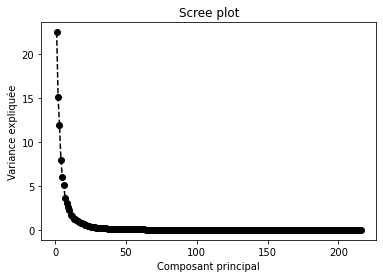

In [600]:
plt.plot(range(1,217),res1['Prop.of Variance(%)'], linestyle='--',
              marker='o', color='black')
plt.ylabel("Variance expliquée")
plt.xlabel("Composant principal")
plt.title('Scree plot')

>* A present on peut entrainer le modele sachant qu'on prendra 23 composants

In [601]:
pca = PCA(n_components = 23).fit(mfeat_fac_scaled)

mfeat_fac_pca = pca.transform(mfeat_fac_scaled)


In [602]:
# nouvelle base de donnee

mfeat_fac_pca = pd.DataFrame(mfeat_fac_pca)
mfeat_fac_pca.columns = ["C_fac_"+str(i) for i in range(mfeat_fac_pca.shape[1])]
mfeat_fac_pca


,C_fac_0,C_fac_1,C_fac_2,C_fac_3,C_fac_4,C_fac_5,C_fac_6,C_fac_7,C_fac_8,C_fac_9,...,C_fac_13,C_fac_14,C_fac_15,C_fac_16,C_fac_17,C_fac_18,C_fac_19,C_fac_20,C_fac_21,C_fac_22
0,-6.777101,-7.629608,-5.500168,-2.723365,3.259357,-2.373637,-1.352780,0.418525,1.024810,2.494847,...,-3.034387,-2.770964,0.041006,-0.713816,0.079352,1.854911,-2.136431,-0.375811,0.653327,-0.582458
1,-4.754313,-8.548131,-3.301594,-2.911242,3.697347,-3.626816,0.276494,0.642649,0.376101,1.844528,...,0.653869,-2.022862,-1.249172,0.491904,1.089416,0.194906,-1.222151,-0.229625,0.830511,0.141507
2,-7.433662,-8.830545,-2.212491,-1.159079,2.863339,-2.612159,-1.476732,2.494582,2.094860,0.179853,...,-1.023707,-1.308031,1.937247,2.235799,1.430009,0.616423,-0.021642,0.071549,0.732627,-0.539062
3,-5.653340,-7.355964,-3.854220,-1.324342,3.812401,-2.336163,-0.786773,2.735545,0.815793,0.417103,...,-1.315921,1.427437,1.136532,0.109972,1.975594,-1.582857,0.117603,-0.078368,1.468799,0.170372
4,-5.851137,-6.252303,-3.453557,-2.752280,2.904861,-5.319443,1.134564,0.199900,2.642544,2.771624,...,-0.907798,-1.601632,-1.036092,2.121392,-0.030698,-0.587901,0.120943,-0.087495,-0.434156,1.138460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.082240,-7.491309,4.699895,2.760712,-3.398750,-1.988663,0.260924,-1.752620,3.608504,-2.238054,...,-0.125407,1.722925,0.840896,-2.002733,-0.823432,0.402433,-0.770874,2.656127,0.014194,2.049650
1996,9.135371,-4.882297,-0.262807,1.604751,-1.470543,-1.742099,0.081589,2.740880,2.334730,0.909118,...,-2.038337,3.888013,-2.758378,1.029245,0.573119,0.566752,-0.273342,1.147164,0.450882,0.129483
1997,4.177919,-5.859228,2.870253,6.530949,-0.393277,-2.539021,3.464651,-4.045451,0.337162,-0.385630,...,-1.482816,-1.552304,0.216133,-1.059756,-1.423600,-0.130547,1.312866,1.392592,0.955085,-0.090759
1998,2.875606,-8.832372,5.420942,3.425844,0.045595,-0.452284,0.243112,-1.819448,0.716323,-0.240781,...,-1.034144,-1.377911,-0.536011,-0.639569,0.564775,-2.185702,0.742357,0.609556,1.236599,1.617830


### Exemple de visualisation du nuage de points sur le plan formé par les deux premiers composants

Text(0.5, 1.0, 'PCA projection for mfeat_fac')

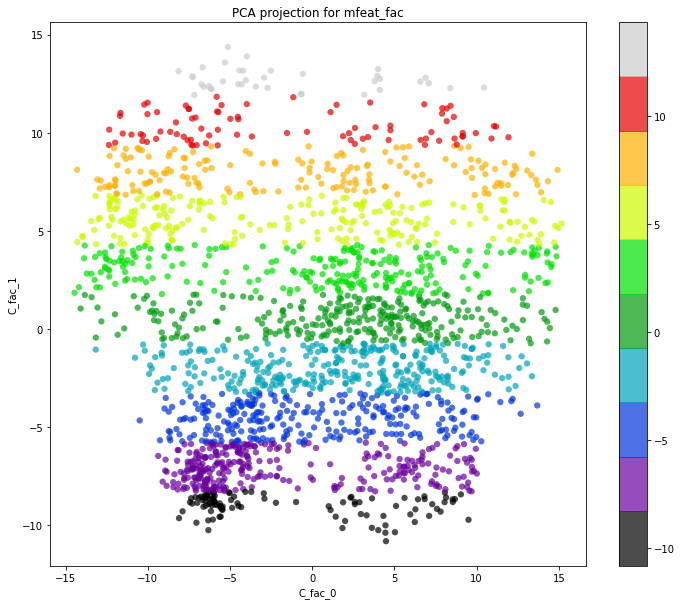

In [603]:
plt.figure(figsize=(12,10))
plt.scatter(mfeat_fac_pca['C_fac_0'],mfeat_fac_pca['C_fac_1'], c=mfeat_fac_pca['C_fac_1'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.xlabel('C_fac_0')
plt.ylabel('C_fac_1')
plt.title('PCA projection for mfeat_fac')

### Apres avoir synthetisé nos variables nous allons classifier les images en utilisant la nouvelle base de donnée. 

In [604]:
# Dans notre nouvelle base nous allons faire un clustering en utilisant les deux premieres composantes 
mfeat_fac_pca.iloc[:,0:2:]

,C_fac_0,C_fac_1
0,-6.777101,-7.629608
1,-4.754313,-8.548131
2,-7.433662,-8.830545
3,-5.653340,-7.355964
4,-5.851137,-6.252303
...,...,...
1995,5.082240,-7.491309
1996,9.135371,-4.882297
1997,4.177919,-5.859228
1998,2.875606,-8.832372


### Pour avoir une idée du nombre de cluster qu'on peut former, nous allons faire une 'classification hiérarchique' plus precisement la classification hiérarchique par liaison de ward (ward's linkage).

## Hierarchical Clustering

In [315]:
from scipy.cluster.hierarchy import dendrogram, linkage
mfeat_fac_new = mfeat_fac_pca.iloc[:,0:2:]
Z = linkage(mfeat_fac_new, 'ward')

Text(0, 0.5, 'Distance')

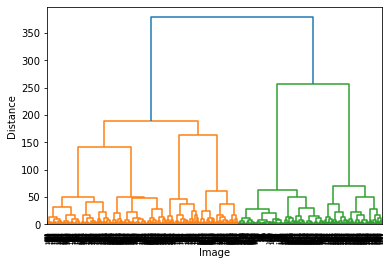

In [317]:
#Tracé du dendrogramme
dendrogram(Z)
plt.xlabel('Image')
plt.ylabel('Distance')

>* Au regard de cette figure, si par exemple on fait une coupure a la distance 100, on obtient 6 classes. Si par contre la coupure est faite a une distance 50, on obtient 10 classes.

### Nous allons a present utiliser ces nombres de cluster pour faire une classification via le 'K means'

## K Means Clustering

### Cas ou le nombre de cluster vaut 6

In [524]:
km_pca = KMeans(n_clusters=6, init = 'k-means++',random_state =42)
km_pca.fit(mfeat_fac_new)

KMeans(n_clusters=6, random_state=42)

In [525]:
mfeat_fac_new['cluster'] = km_pca.labels_
mfeat_fac_new['segment'] =mfeat_fac_new['cluster']
mfeat_fac_new

<ipython-input-525-dd54836015e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfeat_fac_new['cluster'] = km_pca.labels_
<ipython-input-525-dd54836015e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfeat_fac_new['segment'] =mfeat_fac_new['cluster']


,C_fac_0,C_fac_1,cluster,segment
0,-6.777101,-7.629608,1,1
1,-4.754313,-8.548131,1,1
2,-7.433662,-8.830545,1,1
3,-5.653340,-7.355964,1,1
4,-5.851137,-6.252303,1,1
...,...,...,...,...
1995,5.082240,-7.491309,2,2
1996,9.135371,-4.882297,2,2
1997,4.177919,-5.859228,2,2
1998,2.875606,-8.832372,2,2


Text(0.5, 1.0, 'Kmeans projection with k=6')

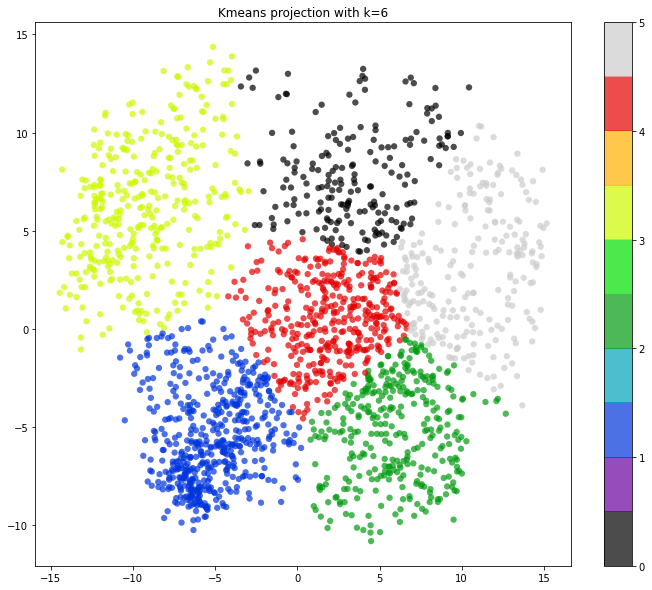

In [526]:
plt.figure(figsize=(12,10))
plt.scatter(mfeat_fac_new['C_fac_0'],mfeat_fac_new['C_fac_1'], c=mfeat_fac_new['cluster'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('Kmeans projection with k=6')

>* Dans ce cas de figure, les 2000 images sont classées en 6 groupes ou chaque couleur représente un groupe.
>* Dans l'ensemble, les 6 segments sont clairement séparés.

### Cas ou le nombre de cluster vaut 10

In [606]:
mfeat_fac_new = mfeat_fac_pca.iloc[:,0:2:]
km_pca = KMeans(n_clusters=10, init = 'k-means++',random_state =42)
km_pca.fit(mfeat_fac_new)

KMeans(n_clusters=10, random_state=42)

<ipython-input-607-7a4721b6234b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfeat_fac_new['cluster'] = km_pca.labels_
<ipython-input-607-7a4721b6234b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfeat_fac_new['segment'] =mfeat_fac_new['cluster']


Text(0.5, 1.0, 'Kmeans projection for mfeat_fac with k=10')

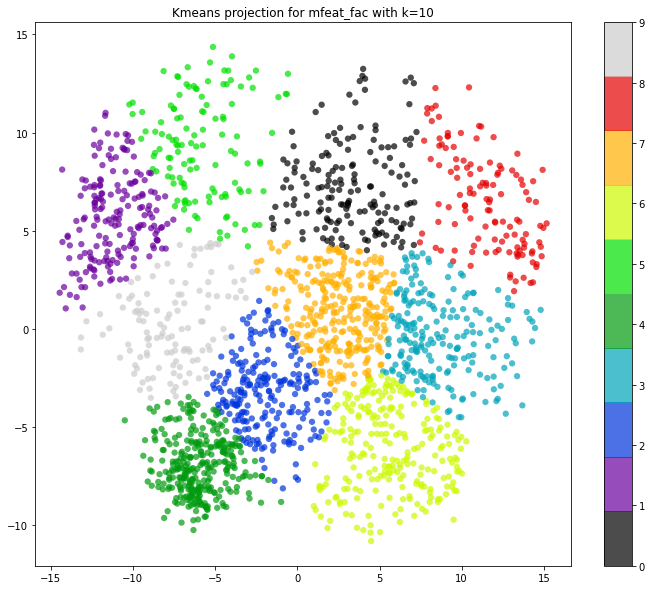

In [607]:
mfeat_fac_new['cluster'] = km_pca.labels_
mfeat_fac_new['segment'] =mfeat_fac_new['cluster']

#plot
plt.figure(figsize=(12,10))
plt.scatter(mfeat_fac_new['C_fac_0'],mfeat_fac_new['C_fac_1'], c=mfeat_fac_new['cluster'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('Kmeans projection for mfeat_fac with k=10')

In [608]:
mfeat_fac_new['cluster'].value_counts()

4    307
7    296
6    246
2    228
3    209
1    183
0    164
8    124
5    124
9    119
Name: cluster, dtype: int64

>* Dans ce cas de figure, les 2000 images sont classées en 10 groupes ou chaque couleur représente un groupe.
>* Dans l'ensemble, les 10 segments sont clairement séparés.

## À titre de comparaison, si nous exécutons uniquement l'algorithme k-means sans l'étape PCA, le résultat serait le suivant:


In [326]:
km = KMeans(n_clusters=10, init = 'k-means++',random_state =42)
km.fit(mfeat_fac)

KMeans(n_clusters=10, random_state=42)

Text(0.5, 1.0, 'Kmeans projection for mfeat_fac with k=10 without using PCA')

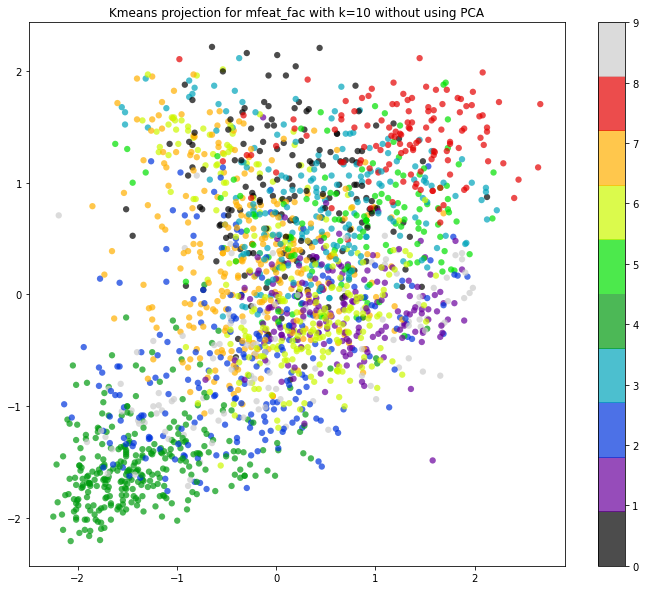

In [609]:
mfeat_fac_scaled['cluster'] = km_pca.labels_
mfeat_fac_scaled['segment'] =mfeat_fac_scaled['cluster']

#plot
plt.figure(figsize=(12,10))
plt.scatter(mfeat_fac_scaled['Fa_0'],mfeat_fac_scaled['Fa_1'], c=mfeat_fac_scaled['cluster'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('Kmeans projection for mfeat_fac with k=10 without using PCA')

>* Dans ce cas, seul le cluster vert est visuellement séparé du reste.Les 9 autres restants sont mélangés tous ensemble.



### Cependant, lorsque nous utilisons le PCA avant d'utiliser K-means, nous pouvons séparer visuellement presque tout l'ensemble de données. C'était l'un des plus grands objectifs de PCA - réduire le nombre de variables en les combinant dans des fonctionnalités plus grandes et plus significatives.

## La meme methodologie sera utilisée pour les autres indicateurs

### INDICATEUR 2: Coefficients de Fourier

### Standardisation de la base de donnée

In [610]:
mfeat_fou_scaled = (mfeat_fou -mfeat_fou.mean(axis=0))/mfeat_fou.std()
mfeat_fou_scaled

,Fo_0,Fo_1,Fo_2,Fo_3,Fo_4,Fo_5,Fo_6,Fo_7,Fo_8,Fo_9,...,Fo_66,Fo_67,Fo_68,Fo_69,Fo_70,Fo_71,Fo_72,Fo_73,Fo_74,Fo_75
0,-1.302125,-1.021382,-1.199823,0.042237,2.020474,-1.375596,0.414231,-1.271732,0.682558,-1.314437,...,-0.000790,-0.232010,-0.919669,1.143573,-0.930830,1.945193,-1.555344,0.966193,-1.097458,1.033932
1,-1.484279,-1.142479,-1.187582,-0.348634,1.912971,-1.315372,0.459295,-1.214412,0.328541,-1.055382,...,-1.136141,-0.911582,-1.238081,0.826089,-1.184021,1.851789,-1.695040,1.354802,-0.700468,1.108955
2,-1.647180,-0.849237,-1.164016,-1.246584,1.997540,-1.143086,0.733331,-1.657649,0.307216,-1.228405,...,-1.505950,1.395548,-1.285361,2.056545,-1.164683,2.309360,-1.448931,1.352909,-0.849241,0.355327
3,-1.340705,-0.904106,-1.370733,0.215960,1.574017,-1.264127,0.420969,-1.811553,0.369221,-0.374476,...,-0.574042,-0.662487,-0.773255,-0.360166,-0.838438,1.389295,-1.687294,1.072482,-0.945240,1.493663
4,-1.344696,-1.015443,-1.146093,-0.110449,1.971694,-1.512923,0.349635,-1.254251,0.178181,-1.175979,...,-1.489310,-0.330990,-1.382170,0.760054,-1.521328,2.406549,-1.551143,1.274072,-0.872768,1.526433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.148756,-0.883988,1.138512,-1.702581,-0.230091,0.696014,0.608194,-0.695161,0.587780,-0.800544,...,-0.210785,1.065276,0.437661,0.265338,-0.125415,-0.064161,-0.848711,-0.156022,1.110577,-0.658901
1996,-0.364739,-0.169502,0.392491,-1.607858,0.810914,1.744991,0.046952,0.125588,0.929720,-0.313266,...,1.288192,0.512294,-1.367458,-0.113662,1.645810,1.016159,0.929467,-1.522660,0.167750,0.525066
1997,1.632918,-0.334134,-0.082834,-0.364113,0.751347,-0.395936,-0.216917,0.765648,0.944632,-0.827359,...,1.643718,-0.104158,1.741318,0.716968,-0.193323,-1.355918,0.160270,-0.963364,-1.228142,-0.839658
1998,0.743927,-1.169536,0.240935,-0.764453,0.166496,0.108354,0.364614,1.226028,-0.194146,-0.625795,...,0.464088,0.613343,-0.118868,0.993058,0.557037,-0.416421,0.439592,-0.285964,-0.470657,-0.714265


### Matrice de Variance-covariance

In [611]:

V_mfeat_fou = mfeat_fou_scaled.corr()
V_mfeat_fou

,Fo_0,Fo_1,Fo_2,Fo_3,Fo_4,Fo_5,Fo_6,Fo_7,Fo_8,Fo_9,...,Fo_66,Fo_67,Fo_68,Fo_69,Fo_70,Fo_71,Fo_72,Fo_73,Fo_74,Fo_75
Fo_0,1.000000,0.195455,0.432445,-0.054397,-0.130640,0.141651,-0.179721,0.635559,-0.318396,-0.069239,...,0.390192,0.270064,0.381104,0.273882,0.465472,-0.286029,0.360756,-0.122473,0.105342,-0.293794
Fo_1,0.195455,1.000000,0.240622,0.401632,-0.331516,0.354433,-0.184539,0.181393,-0.057488,0.258610,...,0.097870,0.035919,0.131111,0.046332,0.229024,-0.271911,0.466406,-0.137309,0.332356,-0.096252
Fo_2,0.432445,0.240622,1.000000,-0.230862,0.045627,0.191618,-0.275318,0.562596,-0.311993,0.093156,...,0.342232,0.266886,0.337531,0.202380,0.505120,-0.254227,0.570625,-0.192991,0.215100,-0.306464
Fo_3,-0.054397,0.401632,-0.230862,1.000000,-0.190518,-0.031723,-0.247865,-0.251078,-0.027279,0.026560,...,-0.184794,-0.182393,-0.127457,-0.113285,-0.184983,0.004469,-0.111254,0.029370,0.097733,0.170066
Fo_4,-0.130640,-0.331516,0.045627,-0.190518,1.000000,-0.325107,0.179689,-0.003781,0.208964,0.109111,...,0.093540,0.165444,0.147259,0.328280,-0.026496,0.372263,-0.057921,0.007341,-0.175270,-0.022803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fo_71,-0.286029,-0.271911,-0.254227,0.004469,0.372263,-0.379173,-0.092213,-0.251314,0.053336,-0.196305,...,-0.367749,0.016673,-0.507517,0.064804,-0.003712,1.000000,-0.203724,0.560979,0.003501,0.399337
Fo_72,0.360756,0.466406,0.570625,-0.111254,-0.057921,0.194067,-0.131679,0.567552,-0.106706,0.087015,...,0.454776,0.373515,0.215959,0.317697,0.637093,-0.203724,1.000000,-0.063202,0.196065,-0.230995
Fo_73,-0.122473,-0.137309,-0.192991,0.029370,0.007341,-0.279727,-0.446635,-0.181014,-0.263431,-0.333800,...,-0.097756,0.096979,-0.509277,0.115220,0.133210,0.560979,-0.063202,1.000000,-0.041120,0.678829
Fo_74,0.105342,0.332356,0.215100,0.097733,-0.175270,0.390735,-0.108413,0.227209,-0.187815,0.321993,...,-0.153747,-0.015732,-0.025435,-0.220946,0.111758,0.003501,0.196065,-0.041120,1.000000,-0.063238


### Valeurs et vecteurs propres

In [612]:
eig_val, eig_vect = np.linalg.eig(V_mfeat_fou)
order = eig_val.argsort()[::-1]  #recupere les indices des valeurs propres par ordre decroissant
eig_val = eig_val[order]
eig_vect = eig_vect[order]

In [613]:
eig_val

array([11.87145575,  5.1884081 ,  4.74954444,  2.75664769,  2.53566141,
        2.4300119 ,  2.17193708,  2.02015539,  1.90311355,  1.73232285,
        1.62982311,  1.58966413,  1.49664465,  1.44478759,  1.3591601 ,
        1.333663  ,  1.20320897,  1.11947343,  1.06805019,  1.05073727,
        0.96782708,  0.91860814,  0.87461379,  0.85775641,  0.84028234,
        0.80963392,  0.78826292,  0.75963046,  0.74512427,  0.71662225,
        0.70295928,  0.68335379,  0.66196933,  0.6464989 ,  0.60905835,
        0.59667875,  0.57687553,  0.54720794,  0.54347043,  0.53142633,
        0.52401705,  0.5151338 ,  0.48941385,  0.47371318,  0.46856599,
        0.46101839,  0.4430834 ,  0.4326288 ,  0.40912251,  0.39967655,
        0.38623498,  0.38327137,  0.36106358,  0.34473973,  0.32697315,
        0.3258395 ,  0.31994813,  0.30239081,  0.29174151,  0.27606848,
        0.26662844,  0.26394103,  0.2436077 ,  0.23027683,  0.22036715,
        0.21497915,  0.20383378,  0.19952157,  0.18165368,  0.17

###  Evaluons les proportions de chaque valeur propre (cas de mfeat_fou)

In [614]:
row = ["Comp." + str(i+1) for i in range(len(eig_val))]
col = ["Std deviation","Prop.of Variance(%)","Cumulative Prop.(%)"]
I_tot = sum(eig_val)                      #inertie totale
res2 = pd.DataFrame([[i**0.5,np.round(i*100 /I_tot,2),np.round(j*100/I_tot,2)]
                      for i,j in zip(eig_val,np.cumsum(eig_val))],
                        columns= col,index = row)


In [615]:
res2.head(20)

,Std deviation,Prop.of Variance(%),Cumulative Prop.(%)
Comp.1,3.445498,15.62,15.62
Comp.2,2.277808,6.83,22.45
Comp.3,2.179345,6.25,28.70
Comp.4,1.660316,3.63,32.32
Comp.5,1.592376,3.34,35.66
Comp.6,1.558850,3.20,38.86
Comp.7,1.473749,2.86,41.72
Comp.8,1.421322,2.66,44.37
Comp.9,1.379534,2.50,46.88
Comp.10,1.316177,2.28,49.16


### Regle de Kaiser

In [616]:
eig_val2,eig_vect2 = Kaiser_rule(eig_val,eig_vect)
print("D'apres la regle de Kaiser le nombre de valeur propre a considerer est: ", len(eig_val2))

D'apres la regle de Kaiser le nombre de valeur propre a considerer est:  20


### Regle de coude

Text(0.5, 1.0, 'Scree plot for mfeat_fou')

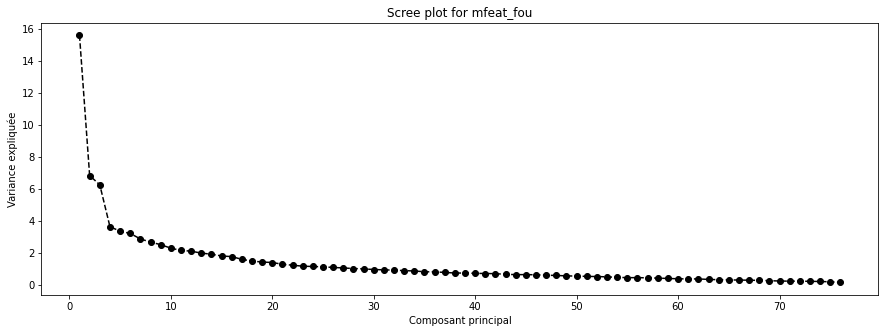

In [618]:
plt.figure(figsize=(15,5))
plt.plot(range(1,77),res2['Prop.of Variance(%)'], linestyle='--',
              marker='o', color='black')
plt.ylabel("Variance expliquée")
plt.xlabel("Composant principal")
plt.title('Scree plot for mfeat_fou')

>* D'apres la regle de coude, le point de cassure ou le coude, se trouve au niveau du quatrieme composant.

### En combinant les deux regles on choisira les 4 premieres valeurs propres qui ne constituent que 32.32% des informations.

In [331]:
pca = PCA(n_components = 4).fit(mfeat_fou_scaled)

mfeat_fou_pca = pca.transform(mfeat_fou_scaled)


In [332]:
# nouvelle base de donnee

mfeat_fou_pca = pd.DataFrame(mfeat_fou_pca)
mfeat_fou_pca.columns = ["C_fou_"+str(i) for i in range(mfeat_fou_pca.shape[1])]
mfeat_fou_pca


,C_fou_0,C_fou_1,C_fou_2,C_fou_3
0,-3.495117,3.477088,1.172938,0.010400
1,-6.102654,4.860484,1.459694,-0.246866
2,-5.806434,4.945706,0.413977,0.253273
3,-5.822003,3.001834,1.870769,0.047458
4,-4.721006,4.315609,1.547188,0.390241
...,...,...,...,...
1995,-0.387965,0.791196,0.790540,1.603268
1996,0.869104,0.862944,-0.271702,1.220048
1997,3.382242,3.716363,-0.187568,-1.967316
1998,1.480825,1.006781,-1.603060,-0.719328


### Exemple de  visualisation du nuage de points sur le plan formé par les deux premiers composants 

Text(0.5, 1.0, 'PCA projection for mfeat_fou')

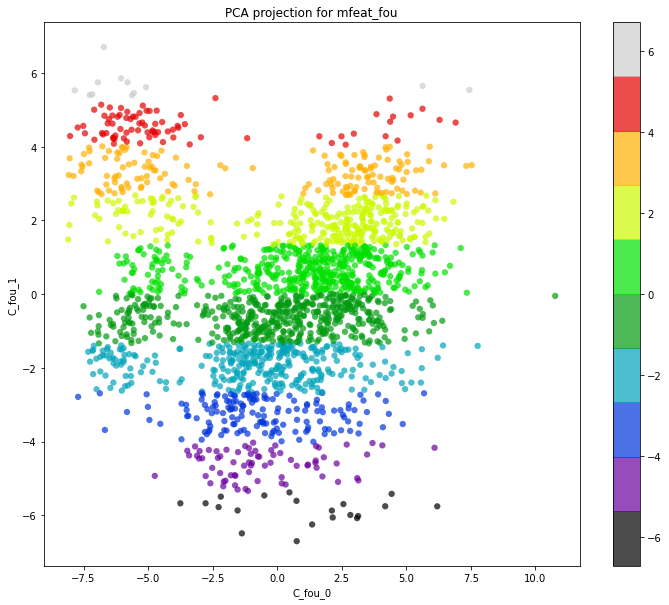

In [619]:
plt.figure(figsize=(12,10))
plt.scatter(mfeat_fou_pca['C_fou_0'],mfeat_fou_pca['C_fou_1'], c=mfeat_fou_pca['C_fou_1'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.xlabel('C_fou_0')
plt.ylabel('C_fou_1')
plt.title('PCA projection for mfeat_fou')

### Dans notre nouvelle base nous allons faire un clustering en utilisant les deux premieres composantes 


In [620]:
 
mfeat_fou_pca.iloc[:,0:2:]

,C_fou_0,C_fou_1
0,-3.495117,3.477088
1,-6.102654,4.860484
2,-5.806434,4.945706
3,-5.822003,3.001834
4,-4.721006,4.315609
...,...,...
1995,-0.387965,0.791196
1996,0.869104,0.862944
1997,3.382242,3.716363
1998,1.480825,1.006781


## Hierarchical Clustering

In [550]:
mfeat_fou_new = mfeat_fou_pca.iloc[:,0:2:]

Text(0.5, 1.0, 'Dendogram for mfeat_fou')

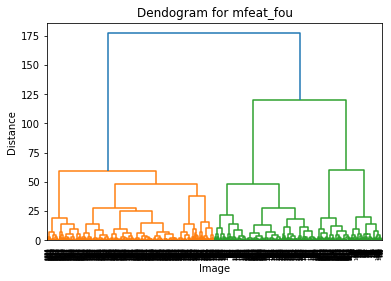

In [552]:
Z = linkage(mfeat_fou_new, 'ward')
#Trace du dendrogramme
dendrogram(Z)
plt.xlabel('Image')
plt.ylabel('Distance')
plt.title('Dendogram for mfeat_fou')

>* En fonction de la distance a la quelle la coupure est effectuee on put obtenir 5,6,10... clusters.

## K Means Clustering

In [387]:
km_pca = KMeans(n_clusters=5, init = 'k-means++',random_state =42)
km_pca.fit(mfeat_fou_new )

mfeat_fou_new['cluster'] = km_pca.labels_
mfeat_fou_new['segment'] =mfeat_fou_new['cluster']



<ipython-input-387-3b11116389a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfeat_fou_new['cluster'] = km_pca.labels_
<ipython-input-387-3b11116389a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfeat_fou_new['segment'] =mfeat_fou_new['cluster']


In [384]:
# a titre de comparaison, on applique le kmeans sur les donnees brutes sans faire de PCA
km = KMeans(n_clusters=5, init = 'k-means++',random_state =42)
km.fit(mfeat_fou_scaled)

mfeat_fou_scaled['cluster'] = km_pca.labels_
mfeat_fou_scaled['segment'] =mfeat_fou_scaled['cluster']

Text(0.5, 1.0, 'Kmeans projection with k=5 without using PCA')

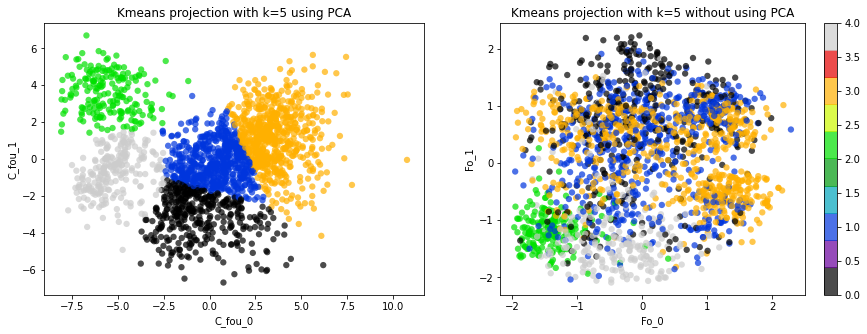

In [396]:
#plot

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(mfeat_fou_new['C_fou_0'],mfeat_fac_new['C_fou_1'], c=mfeat_fou_new['cluster'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('C_fou_0')
plt.ylabel('C_fou_1')
plt.title('Kmeans projection with k=5 using PCA')


plt.subplot(1,2,2)
plt.scatter(mfeat_fou_scaled['Fo_0'],mfeat_fou_scaled['Fo_1'], c=mfeat_fou_scaled['cluster'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.xlabel('Fo_0')
plt.ylabel('Fo_1')
plt.title('Kmeans projection with k=5 without using PCA')

>* Sur la figure de gauche,  on peut voir que les images sont repartir en 5 classes bien visible. Par contre sur la figure de droite les couleurs sont melangées.
>* La classification sur la premiere figure est obtenue a partie des donnees sur les quelles on n'a fait de l'ACP. Celle de droite est obtenue a partir des donnees brutes.Une fois de plus nous constatons que faire de l'ACP sur les donnees avant de les classifier permet de mieux observer et distinguer les classes.

### INDICATEUR 3:  Valeurs des pixels moyennés

### Standardisation de la base de donnée

In [621]:
mfeat_pix_scaled = (mfeat_pix -mfeat_pix.mean(axis=0))/mfeat_pix.std()
mfeat_pix_scaled

,P_0,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,...,P_230,P_231,P_232,P_233,P_234,P_235,P_236,P_237,P_238,P_239
0,-0.399821,0.78186,0.793471,0.504285,1.091143,0.965017,0.869251,0.860257,0.879071,0.477555,...,0.760559,0.675036,0.648329,0.660726,0.741598,0.276002,-1.142357,-0.843050,-0.593126,-0.368213
1,-0.399821,-0.62732,-0.867813,-1.137000,-1.423495,-1.712486,-1.483892,-0.602350,-0.087207,0.023605,...,-0.369963,0.675036,0.648329,0.660726,0.741598,-0.290737,-1.142357,-0.843050,-0.593126,-0.368213
2,-0.399821,-0.62732,-0.452492,0.504285,0.252931,0.072516,-0.072006,-0.114815,-0.087207,-0.430344,...,-0.935224,0.087537,0.648329,0.660726,0.741598,0.842741,1.048690,0.272464,0.052981,-0.368213
3,-0.399821,-0.62732,0.378150,0.093964,-0.585282,-0.819985,-0.072006,0.372721,0.879071,0.931504,...,0.760559,0.675036,0.648329,0.660726,-0.454045,-1.424216,-1.142357,-0.843050,-0.593126,-0.368213
4,-0.399821,-0.62732,-0.867813,-1.137000,-1.423495,-1.712486,-0.542635,-0.114815,0.879071,0.931504,...,0.760559,0.675036,0.648329,0.660726,0.143776,-0.857477,-1.142357,-0.843050,-0.593126,-0.368213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.399821,-0.62732,-0.867813,-0.726679,-0.166176,0.072516,0.398623,0.860257,-0.087207,0.023605,...,0.760559,0.675036,0.648329,0.660726,0.741598,0.842741,1.048690,-0.843050,-0.593126,-0.368213
1996,-0.399821,-0.62732,-0.867813,-1.137000,-0.166176,0.965017,0.869251,0.860257,0.879071,0.931504,...,0.760559,0.675036,0.648329,0.053720,-1.649689,-1.424216,-1.142357,-0.843050,-0.593126,-0.368213
1997,-0.399821,-0.62732,-0.867813,-0.316358,0.252931,0.072516,-0.072006,0.860257,-0.087207,0.023605,...,-1.500485,-0.499962,0.648329,0.660726,0.741598,-0.857477,-1.142357,-0.843050,-0.593126,-0.368213
1998,-0.399821,-0.62732,-0.867813,-1.137000,-1.423495,-1.712486,-1.013264,-0.114815,-0.087207,0.477555,...,0.195298,0.675036,0.648329,0.660726,0.741598,-0.290737,-1.142357,-0.843050,-0.593126,-0.368213


### Matrice de Correlation

In [622]:
V_mfeat_pix = mfeat_pix.corr()
V_mfeat_pix

,P_0,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,...,P_230,P_231,P_232,P_233,P_234,P_235,P_236,P_237,P_238,P_239
P_0,1.000000,0.801406,0.591517,0.442680,0.313117,0.230198,0.181140,0.153553,0.138066,0.146714,...,-0.009926,0.030076,0.011027,-0.034221,-0.097907,-0.153188,-0.136505,-0.125340,-0.099530,-0.056639
P_1,0.801406,1.000000,0.854709,0.652714,0.453209,0.312802,0.211372,0.147209,0.126912,0.132472,...,0.049521,0.091111,0.052086,-0.025334,-0.093926,-0.144256,-0.122454,-0.105009,-0.081981,-0.020782
P_2,0.591517,0.854709,1.000000,0.870829,0.634085,0.452828,0.295257,0.185957,0.126547,0.103964,...,0.118715,0.159616,0.113531,0.032896,-0.049055,-0.104187,-0.080381,-0.068319,-0.060182,0.009224
P_3,0.442680,0.652714,0.870829,1.000000,0.852666,0.636848,0.410762,0.224350,0.107667,0.055925,...,0.165659,0.191833,0.140638,0.058618,-0.033027,-0.089929,-0.068343,-0.061220,-0.054714,0.013268
P_4,0.313117,0.453209,0.634085,0.852666,1.000000,0.857465,0.591205,0.331102,0.135821,0.038663,...,0.200164,0.212864,0.163644,0.086053,-0.017708,-0.085529,-0.075314,-0.071756,-0.070301,-0.024877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P_235,-0.153188,-0.144256,-0.104187,-0.089929,-0.085529,-0.067721,-0.074183,-0.078873,-0.094676,-0.123893,...,-0.142232,-0.081637,0.111504,0.402320,0.750626,1.000000,0.816749,0.550800,0.335974,0.161246
P_236,-0.136505,-0.122454,-0.080381,-0.068343,-0.075314,-0.085011,-0.120728,-0.141645,-0.155539,-0.188216,...,-0.253080,-0.236088,-0.105931,0.136081,0.457061,0.816749,1.000000,0.830895,0.579472,0.347185
P_237,-0.125340,-0.105009,-0.068319,-0.061220,-0.071756,-0.093728,-0.131907,-0.157921,-0.173716,-0.219477,...,-0.289815,-0.294171,-0.225042,-0.059865,0.214180,0.550800,0.830895,1.000000,0.805450,0.505758
P_238,-0.099530,-0.081981,-0.060182,-0.054714,-0.070301,-0.087067,-0.107835,-0.133214,-0.148568,-0.198887,...,-0.302856,-0.323273,-0.283816,-0.182757,0.033343,0.335974,0.579472,0.805450,1.000000,0.726799


In [623]:
eig_val, eig_vect = np.linalg.eig(V_mfeat_pix)
order = eig_val.argsort()[::-1]  #recupere les indices des valeurs propres par ordre decroissant
eig_val = eig_val[order]
eig_vect = eig_vect[order]

In [624]:
eig_val

array([3.87113925e+01, 2.34341778e+01, 2.10709301e+01, 1.51418671e+01,
       1.30714045e+01, 1.02428358e+01, 8.96178315e+00, 7.22573064e+00,
       7.10675582e+00, 6.01782942e+00, 4.71709235e+00, 4.42483122e+00,
       4.08934191e+00, 3.73224231e+00, 3.45976752e+00, 3.14611911e+00,
       2.94006629e+00, 2.72142003e+00, 2.48196301e+00, 2.40051101e+00,
       2.13586538e+00, 1.94673865e+00, 1.89793455e+00, 1.81451899e+00,
       1.63583613e+00, 1.46793898e+00, 1.37724147e+00, 1.23181313e+00,
       1.21784596e+00, 1.14423472e+00, 1.12012146e+00, 1.11251043e+00,
       1.01321169e+00, 9.06712274e-01, 8.61648362e-01, 8.44480935e-01,
       8.26061170e-01, 7.55290299e-01, 7.41135088e-01, 7.29350039e-01,
       6.84015260e-01, 6.64260605e-01, 6.36571994e-01, 5.99896666e-01,
       5.63839712e-01, 5.51552723e-01, 5.38140714e-01, 5.17815205e-01,
       5.10827548e-01, 4.98925831e-01, 4.68907855e-01, 4.57036820e-01,
       4.48160212e-01, 4.29564425e-01, 4.19150064e-01, 4.08710316e-01,
      

### Evaluons les proportions de chaque valeur propre

In [625]:
row = ["Comp." + str(i+1) for i in range(len(eig_val))]
col = ["Std deviation","Prop.of Variance(%)","Cumulative Prop.(%)"]
I_tot = sum(eig_val)                      #inertie totale
res3 = pd.DataFrame([[i**0.5,np.round(i*100 /I_tot,2),np.round(j*100/I_tot,2)]
                      for i,j in zip(eig_val,np.cumsum(eig_val))],
                        columns= col,index = row)


In [626]:
res3.head(20)

,Std deviation,Prop.of Variance(%),Cumulative Prop.(%)
Comp.1,6.221848,16.13,16.13
Comp.2,4.840886,9.76,25.89
Comp.3,4.590308,8.78,34.67
Comp.4,3.891255,6.31,40.98
Comp.5,3.615440,5.45,46.43
Comp.6,3.200443,4.27,50.70
Comp.7,2.993624,3.73,54.43
Comp.8,2.688072,3.01,57.44
Comp.9,2.665850,2.96,60.40
Comp.10,2.453126,2.51,62.91


In [627]:
eig_val3,eig_vect3 = Kaiser_rule(eig_val,eig_vect)
print("D'apres la regle de Kaiser le nombre de valeur propre a considerer est: ", len(eig_val3))

D'apres la regle de Kaiser le nombre de valeur propre a considerer est:  33


Text(0.5, 1.0, 'Scree plot for mfeat_pix')

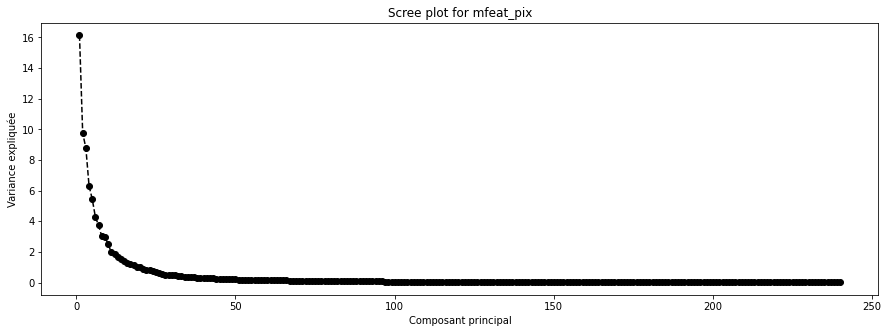

In [629]:
#Regle de Kaiser
plt.figure(figsize=(15,5))
plt.plot(range(1,241),res3['Prop.of Variance(%)'], linestyle='--',
              marker='o', color='black')
plt.ylabel("Variance expliquée")
plt.xlabel("Composant principal")
plt.title('Scree plot for mfeat_pix')

 >* D'apres la regle de coude on conservera 4 axes qui ne constituent que 40.98% des informations

>* En combinant les deux regles on conservera les 4 premieres valeurs

In [630]:
pca = PCA(n_components = 4).fit(mfeat_pix_scaled)

mfeat_pix_pca = pca.transform(mfeat_pix_scaled)


In [631]:
# nouvelle base de donnee

mfeat_pix_pca = pd.DataFrame(mfeat_pix_pca)
mfeat_pix_pca.columns = ["C_pix_"+str(i) for i in range(mfeat_pix_pca.shape[1])]
mfeat_pix_pca


,C_pix_0,C_pix_1,C_pix_2,C_pix_3
0,-3.100257,-10.060395,-1.964921,-2.390038
1,-1.129491,-6.764225,2.284958,-2.690887
2,-4.536548,-6.635217,-0.305776,1.079855
3,-0.965433,-7.526587,-0.434067,-2.033506
4,-4.932282,-6.131145,0.826962,-5.037268
...,...,...,...,...
1995,0.904836,-5.999718,4.006042,1.056730
1996,6.420508,-4.787937,4.804676,-0.753699
1997,3.085657,-5.756813,2.677243,3.934108
1998,0.648742,-6.125005,5.651998,0.937774


Text(0.5, 1.0, 'PCA projection for mfeat_pix')

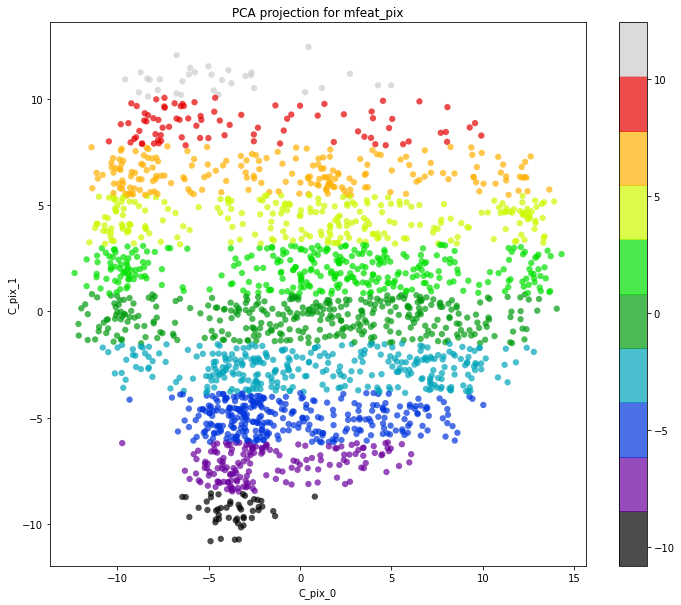

In [412]:
#Exemple de visualization sur le plan forme par les deux premiers composants

plt.figure(figsize=(12,10))
plt.scatter(mfeat_pix_pca['C_pix_0'],mfeat_pix_pca['C_pix_1'], c=mfeat_pix_pca['C_pix_1'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.xlabel('C_pix_0')
plt.ylabel('C_pix_1')
plt.title('PCA projection for mfeat_pix')

In [ ]:
## Hierarchical Clustering

In [633]:
mfeat_pix_new = mfeat_pix_pca.iloc[:,0:2:]

Text(0.5, 1.0, 'Dendogram for mfeat_pix')

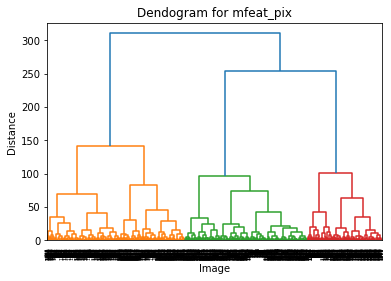

In [547]:

Z = linkage(mfeat_pix_new, 'ward')
#Trace du dendrogramme
dendrogram(Z)
plt.xlabel('Image')
plt.ylabel('Distance')
plt.title('Dendogram for mfeat_pix')

In [ ]:
## K Means Clustering

In [634]:
km_pca = KMeans(n_clusters=4, init = 'k-means++',random_state =42)
km_pca.fit(mfeat_pix_new )

mfeat_pix_new['cluster'] = km_pca.labels_
mfeat_pix_new['segment'] =mfeat_pix_new['cluster']


<ipython-input-634-d347d3388dbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfeat_pix_new['cluster'] = km_pca.labels_


In [635]:
# a titre de comparaison, on applique le kmeans sur les donnees brutes sans faire de PCA
km = KMeans(n_clusters=4, init = 'k-means++',random_state =42)
km.fit(mfeat_pix_scaled)

mfeat_pix_scaled['cluster'] = km_pca.labels_
mfeat_pix_scaled['segment'] =mfeat_pix_scaled['cluster']

Text(0.5, 1.0, 'Kmeans projection for mfeat_pix with k=4 without using PCA')

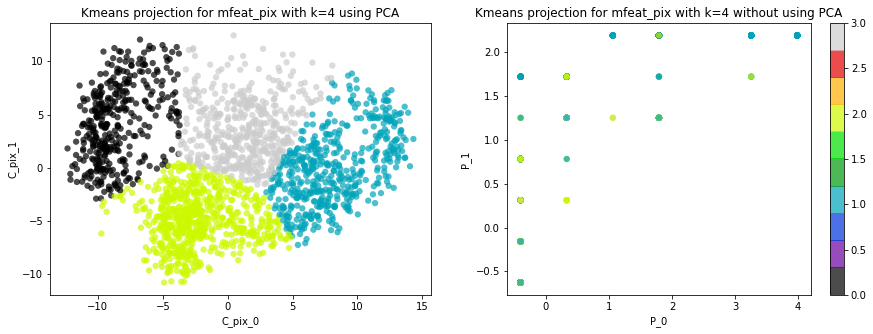

In [636]:
#plot

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(mfeat_pix_new['C_pix_0'],mfeat_pix_new['C_pix_1'], c=mfeat_pix_new['cluster'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('C_pix_0')
plt.ylabel('C_pix_1')
plt.title('Kmeans projection for mfeat_pix with k=4 using PCA')


plt.subplot(1,2,2)
plt.scatter(mfeat_pix_scaled['P_0'],mfeat_pix_scaled['P_1'], c=mfeat_pix_scaled['cluster'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.xlabel('P_0')
plt.ylabel('P_1')
plt.title('Kmeans projection for mfeat_pix with k=4 without using PCA')

 ## INDICATEUR 4: Coefficients de Karhunen-Love

### Standardisation

In [637]:
mfeat_kar_scaled = (mfeat_kar -mfeat_kar.mean(axis=0))/mfeat_kar.std()
mfeat_kar_scaled

,K_0,K_1,K_2,K_3,K_4,K_5,K_6,K_7,K_8,K_9,...,K_54,K_55,K_56,K_57,K_58,K_59,K_60,K_61,K_62,K_63
0,-1.193242,-1.921095,1.836081,-0.674821,0.288799,0.930060,-0.282838,-2.096057,0.581502,1.394546,...,0.902490,0.764091,0.464197,-0.492496,0.463872,0.467959,0.402855,2.071724,-1.783134,-0.285103
1,-0.509223,-2.134259,-0.208928,-0.189349,0.058177,0.969106,-1.230444,-1.464265,0.011382,0.829419,...,0.771614,2.528290,1.424336,-2.163437,1.563296,0.101466,0.660279,0.595047,0.451210,0.776332
2,-1.107710,-1.044523,-0.168110,-0.608791,-0.648667,0.729636,-1.434295,-0.084827,-0.139210,1.564927,...,-0.535435,-0.062485,-0.072345,1.386566,-0.335698,-0.719149,2.217042,1.275055,0.658228,-1.548581
3,-0.719118,-1.112389,0.498459,-0.722295,0.151096,0.882735,-2.081990,-1.529535,-0.256515,0.778916,...,-1.063896,-0.955392,-0.256704,-1.812804,1.233543,0.057747,-1.577346,-0.959907,-1.133589,0.475468
4,-1.241025,-1.799926,-0.202966,-0.214510,-0.174780,-1.229319,-1.713585,-0.846463,0.779301,0.227958,...,0.010450,1.224399,-1.337083,-3.293685,-0.470744,1.651384,0.581027,0.386726,-1.325754,1.300440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.168479,-1.038210,0.668738,0.912739,2.314805,-0.686859,-0.224758,1.597186,-0.643541,0.448777,...,-1.523952,-0.667144,-0.028821,0.597563,-0.898241,0.425438,-0.420609,-0.283523,-0.345413,-0.846709
1996,0.911693,-1.312167,0.088534,0.950680,-0.468153,-0.517863,-1.316008,-0.743460,-1.074117,1.355921,...,-0.785250,1.071197,0.187710,0.581289,1.737265,-0.191239,0.435413,-0.087062,0.768562,1.933391
1997,0.390185,-1.568446,-0.180831,-0.177832,1.249721,0.244596,0.352805,-0.897106,-0.744363,0.315730,...,-0.254279,-1.461745,0.272453,0.610594,1.161071,1.120400,0.778252,-0.433291,0.052891,-0.233235
1998,-0.053497,-1.661666,-0.427255,0.602944,2.212975,0.168723,-0.343936,0.582459,-1.225007,-0.090607,...,-0.350071,-0.450256,0.085663,-0.734179,0.134830,-0.548510,1.120571,1.616712,0.219308,-0.042467


In [638]:
V_mfeat_kar = mfeat_kar_scaled.corr()
V_mfeat_kar

,K_0,K_1,K_2,K_3,K_4,K_5,K_6,K_7,K_8,K_9,...,K_54,K_55,K_56,K_57,K_58,K_59,K_60,K_61,K_62,K_63
K_0,1.000000,-0.000446,0.241479,0.157663,-0.096850,0.068977,-0.045946,0.287433,-0.173884,0.406825,...,0.058542,-0.235510,0.055715,0.211497,0.137962,-0.227596,-0.113014,-0.075176,-0.097831,-0.125565
K_1,-0.000446,1.000000,-0.196444,-0.019315,-0.268260,-0.061282,0.301624,0.060742,0.346697,-0.087258,...,0.049504,0.177281,0.062160,0.008755,0.000631,0.050994,-0.033116,-0.255998,-0.020407,0.049603
K_2,0.241479,-0.196444,1.000000,-0.102699,-0.084060,-0.190497,-0.155880,0.175175,-0.094364,0.279672,...,0.016687,-0.171078,-0.043658,0.042062,0.102262,-0.147011,-0.091955,-0.056874,-0.060262,-0.143966
K_3,0.157663,-0.019315,-0.102699,1.000000,0.276935,-0.027456,-0.021979,-0.010258,0.057545,0.272868,...,0.062900,-0.044208,0.003282,0.057709,-0.055367,0.055955,-0.075752,-0.008789,-0.106807,-0.084635
K_4,-0.096850,-0.268260,-0.084060,0.276935,1.000000,-0.017013,-0.047918,-0.028345,-0.252626,-0.105191,...,0.001199,-0.165588,-0.024801,0.032976,-0.036347,-0.061013,0.076835,0.190002,-0.017446,0.012563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K_59,-0.227596,0.050994,-0.147011,0.055955,-0.061013,-0.165645,-0.188354,-0.139273,0.078320,-0.131716,...,0.101797,0.171431,0.026198,-0.109637,-0.137989,1.000000,0.005344,0.020807,-0.038457,0.184934
K_60,-0.113014,-0.033116,-0.091955,-0.075752,0.076835,0.016559,-0.028217,-0.004451,-0.043017,-0.059426,...,0.009737,0.000688,-0.031514,0.070231,-0.025580,0.005344,1.000000,0.046971,0.050873,-0.004126
K_61,-0.075176,-0.255998,-0.056874,-0.008789,0.190002,0.023176,-0.121102,0.078203,-0.111980,-0.062202,...,-0.007276,0.091936,-0.075761,0.086809,0.015328,0.020807,0.046971,1.000000,-0.016216,0.008043
K_62,-0.097831,-0.020407,-0.060262,-0.106807,-0.017446,0.059039,0.111669,0.108441,-0.048807,-0.044132,...,0.022992,-0.087364,0.069445,0.055969,0.036380,-0.038457,0.050873,-0.016216,1.000000,-0.102389


In [639]:
#valeurs propres et vecteurs propres
eig_val, eig_vect = np.linalg.eig(V_mfeat_pix)
order = eig_val.argsort()[::-1]  #recupere les indices des valeurs propres par ordre decroissant
eig_val = eig_val[order]
eig_vect = eig_vect[order]

In [640]:
eig_val

array([3.87113925e+01, 2.34341778e+01, 2.10709301e+01, 1.51418671e+01,
       1.30714045e+01, 1.02428358e+01, 8.96178315e+00, 7.22573064e+00,
       7.10675582e+00, 6.01782942e+00, 4.71709235e+00, 4.42483122e+00,
       4.08934191e+00, 3.73224231e+00, 3.45976752e+00, 3.14611911e+00,
       2.94006629e+00, 2.72142003e+00, 2.48196301e+00, 2.40051101e+00,
       2.13586538e+00, 1.94673865e+00, 1.89793455e+00, 1.81451899e+00,
       1.63583613e+00, 1.46793898e+00, 1.37724147e+00, 1.23181313e+00,
       1.21784596e+00, 1.14423472e+00, 1.12012146e+00, 1.11251043e+00,
       1.01321169e+00, 9.06712274e-01, 8.61648362e-01, 8.44480935e-01,
       8.26061170e-01, 7.55290299e-01, 7.41135088e-01, 7.29350039e-01,
       6.84015260e-01, 6.64260605e-01, 6.36571994e-01, 5.99896666e-01,
       5.63839712e-01, 5.51552723e-01, 5.38140714e-01, 5.17815205e-01,
       5.10827548e-01, 4.98925831e-01, 4.68907855e-01, 4.57036820e-01,
       4.48160212e-01, 4.29564425e-01, 4.19150064e-01, 4.08710316e-01,
      

### Evaluons les proportions de chaque valeur propre

In [641]:
row = ["Comp." + str(i+1) for i in range(len(eig_val))]
col = ["Std deviation","Prop.of Variance(%)","Cumulative Prop.(%)"]
I_tot = sum(eig_val)                      #inertie totale
res4 = pd.DataFrame([[i**0.5,np.round(i*100 /I_tot,2),np.round(j*100/I_tot,2)]
                      for i,j in zip(eig_val,np.cumsum(eig_val))],
                        columns= col,index = row)


In [642]:
res4.head(20)

,Std deviation,Prop.of Variance(%),Cumulative Prop.(%)
Comp.1,6.221848,16.13,16.13
Comp.2,4.840886,9.76,25.89
Comp.3,4.590308,8.78,34.67
Comp.4,3.891255,6.31,40.98
Comp.5,3.615440,5.45,46.43
Comp.6,3.200443,4.27,50.70
Comp.7,2.993624,3.73,54.43
Comp.8,2.688072,3.01,57.44
Comp.9,2.665850,2.96,60.40
Comp.10,2.453126,2.51,62.91


In [643]:
#regle de Kaiser
eig_val4,eig_vect4 = Kaiser_rule(eig_val,eig_vect)
print("D'apres la regle de Kaiser le nombre de valeur propre a considerer est: ", len(eig_val4))

D'apres la regle de Kaiser le nombre de valeur propre a considerer est:  33


Text(0.5, 1.0, 'Scree plot for mfeat_kar')

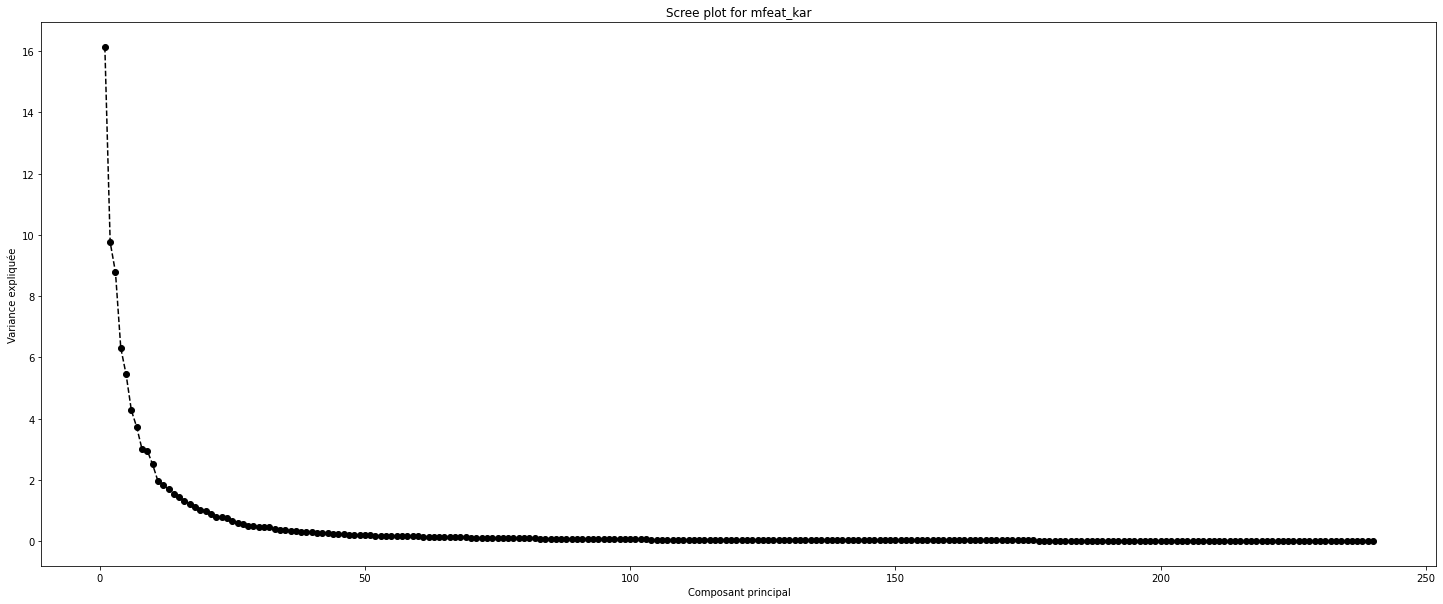

In [644]:
#regle de coude
plt.figure(figsize=(25,10))
plt.plot(range(1,241),res4['Prop.of Variance(%)'], linestyle='--',
              marker='o', color='black')
plt.ylabel("Variance expliquée")
plt.xlabel("Composant principal")
plt.title('Scree plot for mfeat_kar')

>* D'apres la regle de coude, on conservera les 4 premieres valeurs propres qui ne constituent que 40.98% des informations.

### En combinant les deux regles, on conservera les 4 premieres valeurs propres 

In [645]:
pca = PCA(n_components = 4).fit(mfeat_kar_scaled)

mfeat_kar_pca = pca.transform(mfeat_kar_scaled)


In [646]:
# nouvelle base de donnee

mfeat_kar_pca = pd.DataFrame(mfeat_kar_pca)
mfeat_kar_pca.columns = ["C_kar_"+str(i) for i in range(mfeat_kar_pca.shape[1])]
mfeat_kar_pca


,C_kar_0,C_kar_1,C_kar_2,C_kar_3
0,0.650419,-0.795774,1.355258,-1.148561
1,2.011359,-0.264148,0.312757,-2.107805
2,-1.913420,-1.294634,0.163990,-2.475818
3,-0.164296,-2.209754,2.045459,-1.221373
4,4.019277,-0.435885,0.710626,-1.253113
...,...,...,...,...
1995,-2.912382,1.463210,-0.763038,-1.459320
1996,-0.592166,0.252245,1.179164,0.098845
1997,-3.891554,1.034399,0.432355,-2.066162
1998,-1.080002,0.154226,0.337063,-1.411207


### Exemple de visualization sur le plan formé par les deux premiers composants

Text(0.5, 1.0, 'PCA projection for mfeat_kar')

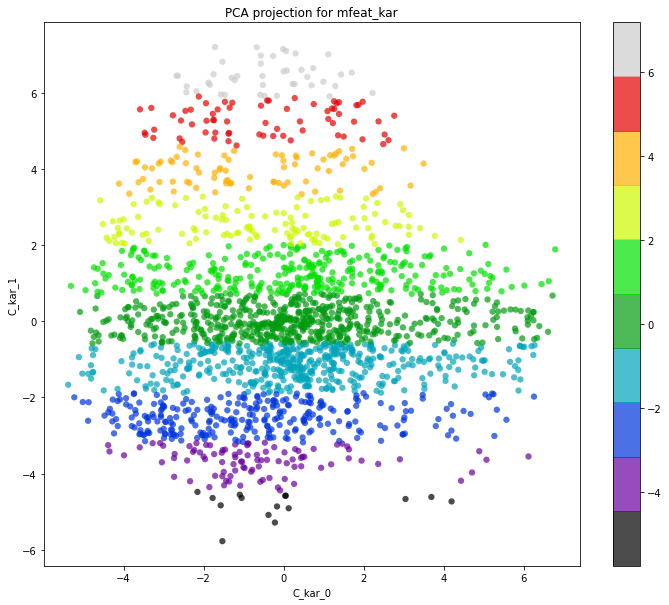

In [411]:
plt.figure(figsize=(12,10))
plt.scatter(mfeat_kar_pca['C_kar_0'],mfeat_kar_pca['C_kar_1'], c=mfeat_kar_pca['C_kar_1'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.xlabel('C_kar_0')
plt.ylabel('C_kar_1')
plt.title('PCA projection for mfeat_kar')

In [ ]:
## Hierarchical Clustering

In [553]:
mfeat_kar_new = mfeat_kar_pca.iloc[:,0:2:]

Text(0.5, 1.0, 'Dendogram for mfeat_kar')

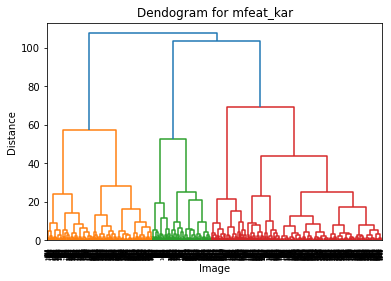

In [554]:
Z = linkage(mfeat_kar_new, 'ward')
#Trace du dendrogramme
dendrogram(Z)
plt.xlabel('Image')
plt.ylabel('Distance')
plt.title('Dendogram for mfeat_kar')

In [ ]:
## K Means Clustering

In [557]:
km_pca = KMeans(n_clusters=5, init = 'k-means++',random_state =42)
km_pca.fit(mfeat_kar_new )

mfeat_kar_new['cluster'] = km_pca.labels_
mfeat_kar_new['segment'] =mfeat_kar_new['cluster']


<ipython-input-557-53cec981258e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfeat_kar_new['cluster'] = km_pca.labels_


In [558]:
# a titre de comparaison, on applique le kmeans sur les donnees brutes sans faire de PCA
km = KMeans(n_clusters=5, init = 'k-means++',random_state =42)
km.fit(mfeat_kar_scaled)

mfeat_kar_scaled['cluster'] = km_pca.labels_
mfeat_kar_scaled['segment'] =mfeat_kar_scaled['cluster']

Text(0.5, 1.0, 'Kmeans projection with k=5 without using PCA')

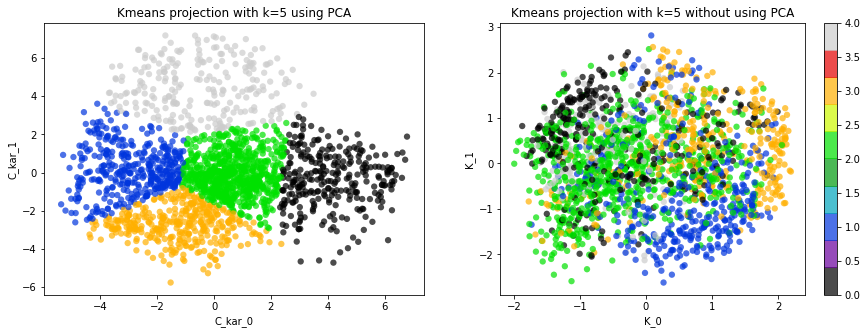

In [559]:
#plot

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(mfeat_kar_new['C_kar_0'],mfeat_kar_new['C_kar_1'], c=mfeat_kar_new['cluster'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('C_kar_0')
plt.ylabel('C_kar_1')
plt.title('Kmeans projection with k=5 using PCA')


plt.subplot(1,2,2)
plt.scatter(mfeat_kar_scaled['K_0'],mfeat_kar_scaled['K_1'], c=mfeat_kar_scaled['cluster'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.xlabel('K_0')
plt.ylabel('K_1')
plt.title('Kmeans projection with k=5 without using PCA')

## INDICATEUR 5: Moments de Zernike

### Standardisation de la base de donnée

In [647]:
mfeat_zer_scaled = (mfeat_zer -mfeat_zer.mean(axis=0))/mfeat_zer.std()
mfeat_zer_scaled

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,Z_37,Z_38,Z_39,Z_40,Z_41,Z_42,Z_43,Z_44,Z_45,Z_46
0,-1.014568,-0.804702,-0.541940,0.154494,1.166017,1.804693,0.586046,0.055656,-0.006433,-0.759656,...,-0.862236,-0.160169,-1.564684,-1.633185,-0.982319,-0.756905,0.074372,-1.276216,-0.678507,0.426795
1,-0.605294,-0.515486,-0.953310,-0.717431,-0.457361,1.242694,1.055715,-0.965414,-1.375080,-0.746418,...,-0.507767,-0.102594,-0.631978,-0.229636,-0.797572,-0.221317,-0.157228,-0.804745,-0.740493,0.135111
2,-0.538764,-0.465228,-1.145411,-0.994480,-1.035138,1.111790,2.414428,-0.872206,-1.036593,-0.750584,...,-0.958162,-0.679116,-1.254390,0.085372,-0.929826,0.211912,-0.689569,-1.155416,-0.898144,0.577542
3,-0.693233,-0.108762,-0.213392,-0.487244,-0.983757,1.312678,1.081663,-0.504180,-0.395396,-0.667718,...,-1.009379,-0.870925,-1.247175,-0.116992,-0.303761,0.438058,-0.811221,-1.402590,-0.257834,0.929265
4,-0.941937,-0.994395,-1.115226,-0.848966,-1.146772,1.561144,0.906341,-0.817467,-0.925241,-0.844406,...,-1.284989,-1.069122,-1.252107,0.393383,-0.483799,-0.692122,-1.091386,-1.205445,-0.376883,-0.234833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.899422,-1.469741,-1.493610,-1.298849,0.513968,0.791822,-0.637891,-1.033889,-1.508105,-1.037910,...,-0.629311,-0.041862,1.809260,-0.308779,-1.078341,-0.054765,-0.078787,1.275978,-0.988880,-0.103721
1996,-0.795666,-1.200022,-1.151729,-0.876845,-0.862151,-0.393282,-0.404159,-0.739630,-0.996601,-0.727318,...,-0.653023,-1.090227,1.731325,-0.067873,0.052504,-0.474398,-1.152910,1.447529,-0.062810,-0.372834
1997,-0.816808,-0.844587,-1.010816,-0.576540,-0.717672,0.926190,-0.703268,-0.758643,-0.465019,-0.186333,...,-0.506915,-0.543326,0.169873,-0.342529,-1.610651,-0.410744,-0.672949,0.289586,-1.573826,-1.103512
1998,-1.029400,-1.316490,-1.741236,-1.530443,-0.523669,1.198398,-1.090010,-0.951538,-0.866541,-0.456865,...,-0.192758,1.144098,0.974136,-1.057371,-1.195390,0.908713,1.017944,0.774183,-1.203794,0.880515


### Matrice de correlation

In [648]:
R_mfeat_zer = mfeat_zer_scaled.corr()
R_mfeat_zer

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,Z_37,Z_38,Z_39,Z_40,Z_41,Z_42,Z_43,Z_44,Z_45,Z_46
Z_0,1.000000,0.582228,0.586857,0.426893,0.172336,-0.359551,0.184742,0.654838,0.469042,0.468497,...,0.417680,0.128900,0.128667,0.292815,0.337360,-0.340369,0.152759,0.197237,0.368042,-0.359140
Z_1,0.582228,1.000000,0.626514,0.333225,0.204875,-0.242210,0.130647,0.315138,0.209559,0.092235,...,0.086897,0.028378,0.039831,0.528529,0.195282,-0.214191,0.040686,-0.013799,0.222016,-0.295527
Z_2,0.586857,0.626514,1.000000,0.707603,0.296111,-0.142328,0.228529,0.458392,0.219453,0.067381,...,0.092037,0.135930,0.056320,0.253483,0.368168,-0.353573,0.157302,0.046610,0.414286,-0.288032
Z_3,0.426893,0.333225,0.707603,1.000000,0.395266,-0.100937,0.162384,0.363167,0.078978,-0.030265,...,0.037422,0.050300,0.076008,0.174278,0.073658,-0.181376,0.066036,0.103868,0.106908,-0.162510
Z_4,0.172336,0.204875,0.296111,0.395266,1.000000,-0.034110,0.144303,0.123658,0.077941,0.025639,...,-0.089770,-0.121355,-0.029718,0.279807,0.027980,-0.126193,-0.093250,-0.047673,0.048947,-0.163263
Z_5,-0.359551,-0.242210,-0.142328,-0.100937,-0.034110,1.000000,0.006064,-0.353543,-0.338631,-0.452482,...,-0.528108,-0.327813,-0.385295,-0.297107,-0.120273,-0.060290,-0.320180,-0.391665,-0.029312,0.313077
Z_6,0.184742,0.130647,0.228529,0.162384,0.144303,0.006064,1.000000,0.102801,0.058558,0.073809,...,-0.110922,-0.223994,-0.301577,0.138892,0.345908,-0.345537,-0.216011,-0.229774,0.360240,-0.236351
Z_7,0.654838,0.315138,0.458392,0.363167,0.123658,-0.353543,0.102801,1.000000,0.602134,0.469504,...,0.588686,0.301767,0.193744,0.153230,0.221699,-0.271314,0.333807,0.259527,0.240466,-0.312004
Z_8,0.469042,0.209559,0.219453,0.078978,0.077941,-0.338631,0.058558,0.602134,1.000000,0.532408,...,0.416282,0.241509,0.177692,0.198760,0.148522,-0.205161,0.267953,0.183596,0.155451,-0.299572
Z_9,0.468497,0.092235,0.067381,-0.030265,0.025639,-0.452482,0.073809,0.469504,0.532408,1.000000,...,0.704732,0.048158,0.238672,-0.031135,0.159070,-0.287466,0.054141,0.392693,0.149732,-0.397480


In [649]:
#valeurs propres et vecteurs propres

eig_val, eig_vect = np.linalg.eig(R_mfeat_zer)
order = eig_val.argsort()[::-1]  #recupere les indices des valeurs propres par ordre decroissant
eig_val = eig_val[order]
eig_vect = eig_vect[order]

In [650]:
eig_val

array([1.22303543e+01, 8.74498343e+00, 4.58254198e+00, 3.85912453e+00,
       2.90601966e+00, 2.37204825e+00, 1.72806170e+00, 1.56396652e+00,
       1.36577315e+00, 1.22039250e+00, 1.08089162e+00, 8.20012785e-01,
       7.10365803e-01, 6.64752268e-01, 5.39418146e-01, 4.26395586e-01,
       3.85767563e-01, 3.48010155e-01, 3.14703886e-01, 2.59035853e-01,
       2.21610294e-01, 2.08094843e-01, 9.67293481e-02, 8.59519326e-02,
       6.11565017e-02, 5.65262450e-02, 4.17871972e-02, 3.34571609e-02,
       2.93805372e-02, 9.56910585e-03, 7.53938335e-03, 7.14057779e-03,
       4.79156752e-03, 3.57397360e-03, 3.16184088e-03, 2.52224308e-03,
       1.51339835e-03, 1.08979327e-03, 7.50796568e-04, 4.71880511e-04,
       2.70034282e-04, 1.66926304e-04, 4.84627296e-05, 3.97354593e-05,
       1.66373567e-05, 1.39064328e-05, 5.99477932e-06])

In [651]:
### Proportion de chaque valeur propre

row = ["Comp." + str(i+1) for i in range(len(eig_val))]
col = ["Std deviation","Prop.of Variance(%)","Cumulative Prop.(%)"]
I_tot = sum(eig_val)                      #inertie totale
res5 = pd.DataFrame([[i**0.5,np.round(i*100 /I_tot,2),np.round(j*100/I_tot,2)]
                      for i,j in zip(eig_val,np.cumsum(eig_val))],
                        columns= col,index = row)


In [652]:
res5

,Std deviation,Prop.of Variance(%),Cumulative Prop.(%)
Comp.1,3.497192,26.02,26.02
Comp.2,2.957192,18.61,44.63
Comp.3,2.140687,9.75,54.38
Comp.4,1.964465,8.21,62.59
Comp.5,1.704705,6.18,68.77
Comp.6,1.540146,5.05,73.82
Comp.7,1.314558,3.68,77.50
Comp.8,1.250586,3.33,80.82
Comp.9,1.168663,2.91,83.73
Comp.10,1.104714,2.60,86.33


In [653]:
#Regle de Kaiser
eig_val5,eig_vect5 = Kaiser_rule(eig_val,eig_vect)
print("D'apres la regle de Kaiser le nombre de valeur propre a considerer est: ", len(eig_val5))

D'apres la regle de Kaiser le nombre de valeur propre a considerer est:  11


In [654]:
print('eigenvalues\n\n',eig_val5)
print('-'*100)
print('eigenvectors\n\n',eig_vect5)

eigenvalues

 [12.230354288889867, 8.74498343052779, 4.5825419823919225, 3.859124530627079, 2.9060196593333605, 2.3720482530948823, 1.7280616983286115, 1.563966523806441, 1.3657731539900322, 1.220392498524701, 1.0808916180112818]
----------------------------------------------------------------------------------------------------
eigenvectors

 [array([-2.22350314e-01, -8.25547073e-02, -2.00755202e-03,  7.88148050e-02,
       -3.02153918e-02,  8.80559756e-02, -7.04315546e-02, -5.11532712e-02,
        4.36177957e-02,  9.59486544e-02, -1.10060348e-01,  1.58715844e-01,
       -1.93002519e-02,  7.02365577e-03, -5.49340422e-02,  3.11520346e-01,
        6.25653541e-02,  4.39029005e-01, -3.94097306e-01, -2.91535755e-01,
       -2.61747655e-01,  3.35688520e-01,  2.40946831e-01,  6.57414744e-02,
        1.93321832e-02,  1.29226238e-02,  4.90741068e-02,  2.94627580e-01,
        2.11310297e-03,  6.50670809e-03,  1.50292216e-02, -2.40265282e-02,
        1.39190746e-02, -1.09980940e-02,  1.31270192e

Text(0.5, 1.0, 'Scree plot for mfeat_zer')

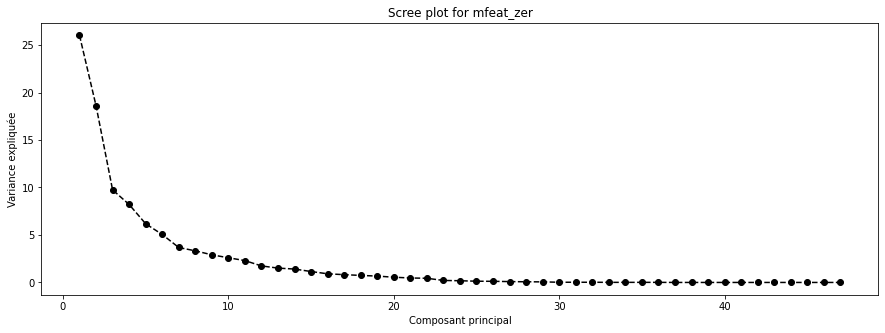

In [656]:
#regle de coude
plt.figure(figsize=(15,5))
plt.plot(range(1,48),res5['Prop.of Variance(%)'], linestyle='--',
              marker='o', color='black')
plt.ylabel("Variance expliquée")
plt.xlabel("Composant principal")
plt.title('Scree plot for mfeat_zer')

>* D'apres la regle de coude on ne prendre que les 3 premieres composantes qui  constituent 54.38% de l'information.

In [657]:
## A present on peut entrainer le modele
pca = PCA(n_components = 3).fit(mfeat_zer_scaled)

mfeat_zer_pca = pca.transform(mfeat_zer_scaled)


In [658]:
mfeat_zer_pca = pd.DataFrame(mfeat_zer_pca)
mfeat_zer_pca.columns = ["C_zer_"+str(i) for i in range(mfeat_zer_pca.shape[1])]
mfeat_zer_pca


,C_zer_0,C_zer_1,C_zer_2
0,-5.320594,1.105788,0.822352
1,-4.740225,-0.111006,0.089803
2,-5.924387,1.522613,-0.065620
3,-4.664454,2.025013,-0.379983
4,-5.754292,1.976923,-0.786628
...,...,...,...
1995,-4.513437,-1.860486,0.230534
1996,-2.806544,-0.883317,-2.468998
1997,-3.010767,-1.985594,-0.589930
1998,-4.652307,-4.747321,1.170812


Text(0.5, 1.0, 'PCA projection for mfeat_zer')

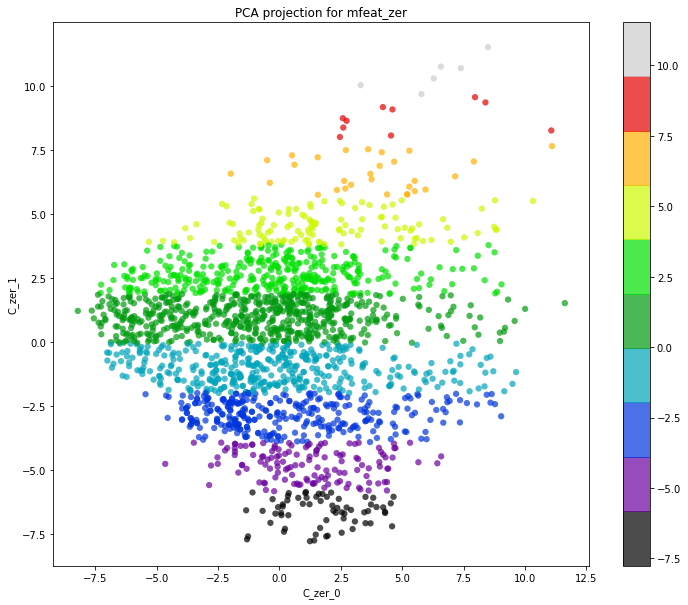

In [439]:
#Exemple de visualization sur le plan forme par les deux premiers composants

plt.figure(figsize=(12,10))
plt.scatter(mfeat_zer_pca['C_zer_0'],mfeat_zer_pca['C_zer_1'], c=mfeat_zer_pca['C_zer_1'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.xlabel('C_zer_0')
plt.ylabel('C_zer_1')
plt.title('PCA projection for mfeat_zer')

In [ ]:
## Hierarchical Clustering

In [555]:
mfeat_zer_new = mfeat_zer_pca.iloc[:,0:2:]

Text(0.5, 1.0, 'Dendogram for mfeat_zer')

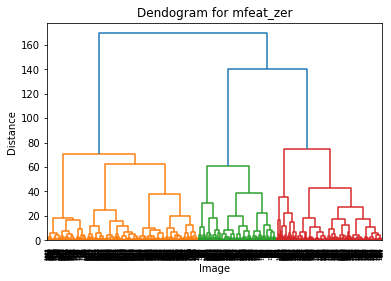

In [556]:
Z = linkage(mfeat_zer_new, 'ward')
#Trace du dendrogramme
dendrogram(Z)
plt.xlabel('Image')
plt.ylabel('Distance')
plt.title('Dendogram for mfeat_zer')

In [432]:
## K Means Clustering

In [434]:
#Prenons 3 clusters
km_pca = KMeans(n_clusters=3, init = 'k-means++',random_state =42)
km_pca.fit(mfeat_zer_new )

mfeat_zer_new['cluster'] = km_pca.labels_
mfeat_zer_new['segment'] = mfeat_zer_new['cluster']


In [437]:
# a titre de comparaison, on applique le kmeans sur les donnees brutes sans faire de PCA
km = KMeans(n_clusters=3, init = 'k-means++',random_state =42)
km.fit(mfeat_zer_scaled)

mfeat_zer_scaled['cluster'] = km_pca.labels_
mfeat_zer_scaled['segment'] =mfeat_zer_scaled['cluster']

Text(0.5, 1.0, 'Kmeans projection with k=3 without using PCA')

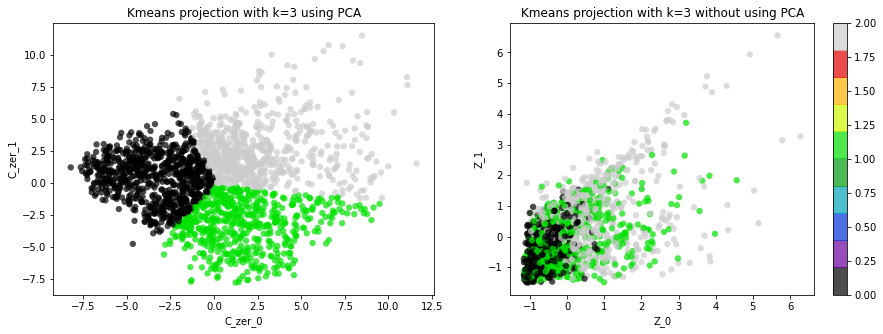

In [438]:
#plot

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(mfeat_zer_new['C_zer_0'],mfeat_zer_new['C_zer_1'], c=mfeat_zer_new['cluster'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('C_zer_0')
plt.ylabel('C_zer_1')
plt.title('Kmeans projection with k=3 using PCA')


plt.subplot(1,2,2)
plt.scatter(mfeat_zer_scaled['Z_0'],mfeat_zer_scaled['Z_1'], c=mfeat_zer_scaled['cluster'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.xlabel('Z_0')
plt.ylabel('Z_1')
plt.title('Kmeans projection with k=3 without using PCA')

## INDICATEUR 6: Morphologie

### Standardisation de la base de donnée

In [659]:
mfeat_mor_scaled = (mfeat_mor -mfeat_mor.mean(axis=0))/mfeat_mor.std()
mfeat_mor_scaled

,M_0,M_1,M_2,M_3,M_4,M_5
0,0.76321,-1.517971,-1.019637,-0.930348,-1.125501,-1.206871
1,0.76321,-1.517971,-1.019637,-1.187285,-1.156216,-1.209768
2,0.76321,-1.517971,-1.019637,-1.009397,-1.100311,-1.220508
3,0.76321,-1.517971,-1.019637,-1.077170,-1.265605,-1.186956
4,0.76321,-1.517971,-1.019637,-1.165774,-1.063905,-1.199553
...,...,...,...,...,...,...
1995,0.76321,-0.642303,0.409427,0.043182,0.055695,-0.220664
1996,0.76321,-0.642303,0.409427,-0.160497,-0.065989,-0.242688
1997,0.76321,-0.642303,0.409427,-0.869493,-0.334968,-0.635623
1998,0.76321,-0.642303,0.409427,-0.539465,-0.731810,-0.542063


### Matrice de corrélation

In [660]:
R_mfeat_mor = mfeat_mor_scaled.corr()
R_mfeat_mor

,M_0,M_1,M_2,M_3,M_4,M_5
M_0,1.000000,-0.850143,0.516263,-0.609249,-0.666205,-0.666857
M_1,-0.850143,1.000000,-0.001067,0.616539,0.674785,0.702786
M_2,0.516263,-0.001067,1.000000,-0.143836,-0.164682,-0.119757
M_3,-0.609249,0.616539,-0.143836,1.000000,0.937760,0.972610
M_4,-0.666205,0.674785,-0.164682,0.937760,1.000000,0.948821
M_5,-0.666857,0.702786,-0.119757,0.972610,0.948821,1.000000


In [661]:
#valeurs propres et vecteurs propres

eig_val, eig_vect = np.linalg.eig(R_mfeat_mor)
order = eig_val.argsort()[::-1]  #recupere les indices des valeurs propres par ordre decroissant
eig_val = eig_val[order]
eig_vect = eig_vect[order]

In [662]:
eig_val

array([4.12558628, 1.13390535, 0.64910166, 0.06524079, 0.02050032,
       0.0056656 ])

In [663]:
### Proportion de chaque valeur propre

row = ["Comp." + str(i+1) for i in range(len(eig_val))]
col = ["Std deviation","Prop.of Variance(%)","Cumulative Prop.(%)"]
I_tot = sum(eig_val)                      #inertie totale
res6 = pd.DataFrame([[i**0.5,np.round(i*100 /I_tot,2),np.round(j*100/I_tot,2)]
                      for i,j in zip(eig_val,np.cumsum(eig_val))],
                        columns= col,index = row)


In [664]:
res6

,Std deviation,Prop.of Variance(%),Cumulative Prop.(%)
Comp.1,2.031154,68.76,68.76
Comp.2,1.064850,18.90,87.66
Comp.3,0.805668,10.82,98.48
Comp.4,0.255423,1.09,99.56
Comp.5,0.143179,0.34,99.91
Comp.6,0.075270,0.09,100.00


>* Dans la tableau 'res6', nous pouvons lire que le premier composant principal capture à lui seul 68.76% de l’information et le deuxième composant 18.9%…etc
>* De meme le cumul des proportions nous montre que les deux premiers composants expliquent 87.66% de l'information.

In [665]:
#Regle de Kaiser
eig_val6,eig_vect6 = Kaiser_rule(eig_val,eig_vect)
print("D'apres la regle de Kaiser le nombre de valeur propre a considerer est: ", len(eig_val6))

D'apres la regle de Kaiser le nombre de valeur propre a considerer est:  2


>* Dans ce cas la base de donnee se resume a 2 nouvelles composantes qui represente 87.66% de l'information

In [666]:
## A present on peut entrainer le modele
pca = PCA(n_components = 2).fit(mfeat_mor_scaled)

mfeat_mor_pca = pca.transform(mfeat_mor_scaled)


### Nouvelle base

In [667]:
mfeat_mor_pca = pd.DataFrame(mfeat_mor_pca)
mfeat_mor_pca.columns = ["C_mor_"+str(i) for i in range(mfeat_mor_pca.shape[1])]
mfeat_mor_pca


,C_mor_0,C_mor_1
0,-2.313512,-1.317567
1,-2.445526,-1.365899
2,-2.344060,-1.330040
3,-2.435576,-1.357902
4,-2.388266,-1.347898
...,...,...
1995,-0.695463,0.541680
1996,-0.854403,0.486626
1997,-1.484170,0.258952
1998,-1.474492,0.278111


Text(0.5, 1.0, 'PCA projection for mfeat_mor')

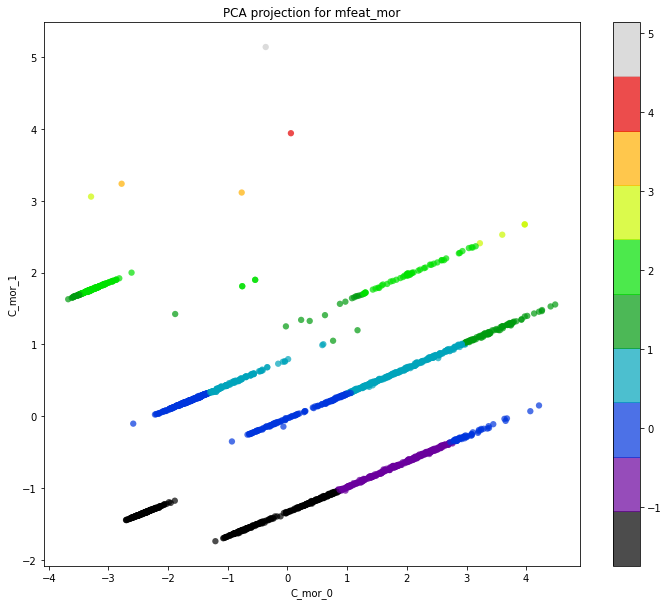

In [466]:
#Exemple de visualization sur le plan forme par les deux premiers composants

plt.figure(figsize=(12,10))
plt.scatter(mfeat_mor_pca['C_mor_0'],mfeat_mor_pca['C_mor_1'], c=mfeat_mor_pca['C_mor_1'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.xlabel('C_mor_0')
plt.ylabel('C_mor_1')
plt.title('PCA projection for mfeat_mor')

In [467]:
## Hierarchical Clustering

Text(0.5, 1.0, 'Dendogram for mfeat_mor')

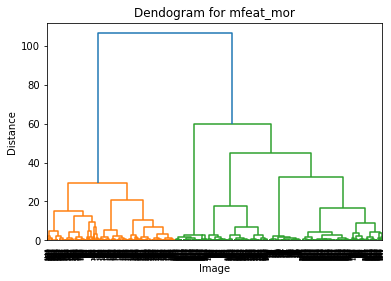

In [560]:
mfeat_mor_new = mfeat_mor_pca.iloc[:,0:2:]
Z = linkage(mfeat_mor_new, 'ward')
#Trace du dendrogramme
dendrogram(Z)
plt.xlabel('Image')
plt.ylabel('Distance')
plt.title('Dendogram for mfeat_mor')

In [ ]:
## K Means Clustering

In [568]:

km_pca = KMeans(n_clusters=10, init = 'k-means++',random_state =42)
km_pca.fit(mfeat_mor_new )

mfeat_mor_new['cluster'] = km_pca.labels_
mfeat_mor_new['segment'] =mfeat_mor_new['cluster']


<ipython-input-568-c62890242926>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfeat_mor_new['cluster'] = km_pca.labels_
<ipython-input-568-c62890242926>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfeat_mor_new['segment'] =mfeat_mor_new['cluster']


In [569]:
# a titre de comparaison, on applique le kmeans sur les donnees brutes sans faire de PCA
km = KMeans(n_clusters=10, init = 'k-means++',random_state =42)
km.fit(mfeat_zer_scaled)

mfeat_mor_scaled['cluster'] = km_pca.labels_
mfeat_mor_scaled['segment'] =mfeat_mor_scaled['cluster']

Text(0.5, 1.0, 'Kmeans projection with k=10 without using PCA')

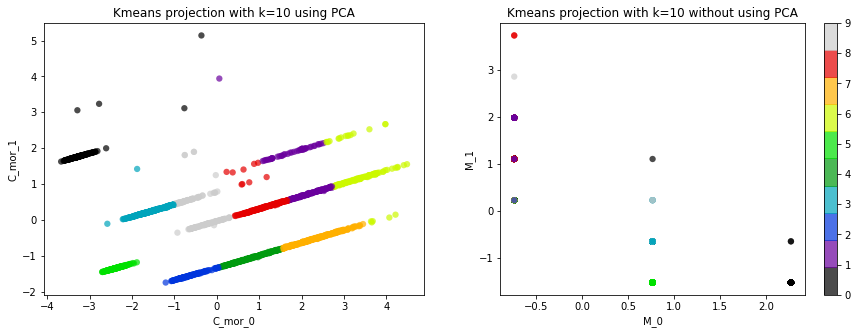

In [570]:
#plot

plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(mfeat_mor_new['C_mor_0'],mfeat_mor_new['C_mor_1'], c=mfeat_mor_new['cluster'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('C_mor_0')
plt.ylabel('C_mor_1')
plt.title('Kmeans projection with k=10 using PCA')


plt.subplot(1,2,2)
plt.scatter(mfeat_mor_scaled['M_0'],mfeat_mor_scaled['M_1'], c=mfeat_mor_scaled['cluster'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.xlabel('M_0')
plt.ylabel('M_1')
plt.title('Kmeans projection with k=10 without using PCA')

In [574]:
mfeat_mor_new['cluster'].value_counts()

3    341
4    259
7    256
5    197
0    194
8    184
1    178
9    136
2    129
6    126
Name: cluster, dtype: int64

## Observations

>* Lorsque nous travaillons sur chaque base de donnée de facon independante, nous constatons qu'on a plus de 2 facteurs principaux pour les differentes bases excepté la base 'Morphologie', rendant impossible la representation des nuages de points.
>* La base 'Morphologie ('mfeat_mor') est celle qui donne une visualisation du nuage des points a deux dimenssions, ceci en conservant 87.66% de l'information.

## Etude faite lorsque  toutes les bases sont regroupées

In [567]:
images = pd.concat([mfeat_fac, mfeat_fou,mfeat_kar,mfeat_pix,mfeat_zer,mfeat_mor],axis=1)
images

,Fa_0,Fa_1,Fa_2,Fa_3,Fa_4,Fa_5,Fa_6,Fa_7,Fa_8,Fa_9,...,Z_43,Z_44,Z_45,Z_46,M_0,M_1,M_2,M_3,M_4,M_5
0,98,236,531,673,607,647,2,9,3,6,...,9.711070,20.007248,47.032578,539.208457,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,121,193,607,611,585,665,7,9,2,4,...,8.140633,44.536711,46.338954,518.496567,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,115,141,590,605,557,627,12,6,3,3,...,4.530921,26.292170,44.574822,549.912691,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,90,122,627,692,607,642,0,6,4,5,...,3.706023,13.432311,51.739930,574.887814,1.0,0.0,0.0,129.478861,1.270878,1695.055281
4,157,167,681,666,587,666,8,6,1,4,...,1.806273,23.689300,50.407770,492.227513,1.0,0.0,0.0,127.262861,1.329637,1647.720235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,304,242,927,626,564,674,25,17,0,7,...,8.672527,152.791625,43.559482,501.537544,1.0,1.0,1.0,157.498861,1.655794,5326.025889
1996,324,330,919,713,609,693,28,16,8,9,...,1.389084,161.716981,53.922259,482.428339,1.0,1.0,1.0,152.404861,1.620345,5243.267754
1997,337,299,852,724,581,660,22,14,10,10,...,4.643621,101.472040,37.013903,430.544358,1.0,1.0,1.0,134.672861,1.541987,3766.763222
1998,247,261,866,633,565,615,24,15,2,4,...,16.109266,126.684436,41.154583,571.426195,1.0,1.0,1.0,142.926861,1.426381,4118.327320


In [530]:
#taille des donnees
images.shape

(2000, 649)

In [531]:
# description
images.describe().T

,count,mean,std,min,25%,50%,75%,max
Fa_0,2000.0,272.051500,91.275454,67.000000,208.000000,274.500000,338.000000,515.000000
Fa_1,2000.0,322.725500,109.426588,81.000000,247.000000,324.000000,406.000000,565.000000
Fa_2,2000.0,774.824500,140.141570,500.000000,656.750000,766.000000,879.000000,1264.000000
Fa_3,2000.0,754.339000,109.173768,543.000000,667.000000,736.000000,830.000000,1134.000000
Fa_4,2000.0,640.460500,48.940117,437.000000,607.000000,636.500000,667.000000,823.000000
...,...,...,...,...,...,...,...,...
M_1,2000.0,1.733500,1.141985,0.000000,1.000000,2.000000,3.000000,6.000000
M_2,2000.0,0.713500,0.699759,0.000000,0.000000,1.000000,1.000000,5.000000
M_3,2000.0,156.418886,25.010014,99.508861,135.014361,150.063861,175.728861,231.276861
M_4,2000.0,1.639569,0.291316,1.143130,1.363562,1.625846,1.881523,2.558830


## Reduction de dimensionalité  avec le PCA

>* Nous allons normaliser cette base afin de reduire la dispersion et ramener les variables a la meme echelle.

### Standardisation

In [532]:
images_scaled = (images-images.mean(axis=0))/ images.std()
images_scaled

,Fa_0,Fa_1,Fa_2,Fa_3,Fa_4,Fa_5,Fa_6,Fa_7,Fa_8,Fa_9,...,Z_43,Z_44,Z_45,Z_46,M_0,M_1,M_2,M_3,M_4,M_5
0,-1.906882,-0.792545,-1.739844,-0.745042,-0.683703,-0.440438,-1.537234,-1.274927,-1.390649,-0.747721,...,0.074372,-1.276216,-0.678507,0.426795,0.76321,-1.517971,-1.019637,-0.930348,-1.125501,-1.206871
1,-1.654897,-1.185503,-1.197535,-1.312944,-1.133232,-0.228870,-1.096765,-1.274927,-1.503170,-1.237387,...,-0.157228,-0.804745,-0.740493,0.135111,0.76321,-1.517971,-1.019637,-1.187285,-1.156216,-1.209768
2,-1.720632,-1.660707,-1.318841,-1.367902,-1.705360,-0.675514,-0.656297,-1.682990,-1.390649,-1.482221,...,-0.689569,-1.155416,-0.898144,0.577542,0.76321,-1.517971,-1.019637,-1.009397,-1.100311,-1.220508
3,-1.994529,-1.834339,-1.054823,-0.571007,-0.683703,-0.499207,-1.713421,-1.682990,-1.278128,-0.992554,...,-0.811221,-1.402590,-0.257834,0.929265,0.76321,-1.517971,-1.019637,-1.077170,-1.265605,-1.186956
4,-1.260487,-1.423105,-0.669498,-0.809160,-1.092366,-0.217116,-1.008672,-1.682990,-1.615692,-1.237387,...,-1.091386,-1.205445,-0.376883,-0.234833,0.76321,-1.517971,-1.019637,-1.165774,-1.063905,-1.199553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.350023,-0.737714,1.085870,-1.175548,-1.562328,-0.123086,0.488920,-0.186757,-1.728213,-0.502888,...,-0.078787,1.275978,-0.988880,-0.103721,0.76321,-0.642303,0.409427,0.043182,0.055695,-0.220664
1996,0.569140,0.066478,1.028785,-0.378653,-0.642837,0.100236,0.753200,-0.322778,-0.828043,-0.013221,...,-1.152910,1.447529,-0.062810,-0.372834,0.76321,-0.642303,0.409427,-0.160497,-0.065989,-0.242688
1997,0.711566,-0.216817,0.550697,-0.277896,-1.214964,-0.287639,0.224639,-0.594821,-0.603001,0.231612,...,-0.672949,0.289586,-1.573826,-1.103512,0.76321,-0.642303,0.409427,-0.869493,-0.334968,-0.635623
1998,-0.274460,-0.564081,0.650596,-1.111430,-1.541895,-0.816560,0.400826,-0.458799,-1.503170,-1.237387,...,1.017944,0.774183,-1.203794,0.880515,0.76321,-0.642303,0.409427,-0.539465,-0.731810,-0.542063


### Matrice de corrélation

In [533]:
R_images = images_scaled.corr()
R_images

,Fa_0,Fa_1,Fa_2,Fa_3,Fa_4,Fa_5,Fa_6,Fa_7,Fa_8,Fa_9,...,Z_43,Z_44,Z_45,Z_46,M_0,M_1,M_2,M_3,M_4,M_5
Fa_0,1.000000,0.503564,0.552987,0.477079,0.340413,0.168384,0.495113,0.322912,0.454491,0.368102,...,0.127434,0.561249,-0.129150,-0.685174,-0.499728,0.551118,-0.062834,0.271710,0.490107,0.367238
Fa_1,0.503564,1.000000,0.633457,0.373621,0.274847,0.327006,0.780144,0.646216,0.535089,0.472714,...,0.371895,0.443281,0.174679,-0.361596,-0.584420,0.539986,-0.236616,0.060332,0.208458,0.130002
Fa_2,0.552987,0.633457,1.000000,-0.095090,0.091490,0.340622,0.894707,0.302030,0.086205,0.390755,...,0.376815,0.472392,0.057440,-0.461937,-0.526572,0.540235,-0.123600,0.127043,0.286695,0.195676
Fa_3,0.477079,0.373621,-0.095090,1.000000,0.475689,0.115787,-0.000169,0.277788,0.793567,0.148521,...,-0.143332,0.165692,0.169450,-0.492972,-0.269165,0.219740,-0.158379,0.186873,0.337645,0.239206
Fa_4,0.340413,0.274847,0.091490,0.475689,1.000000,0.057250,0.118425,0.179999,0.463299,0.213168,...,-0.056295,0.155608,0.277992,-0.344154,-0.232157,0.252855,-0.036404,0.205211,0.289448,0.217374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M_1,0.551118,0.539986,0.540235,0.219740,0.252855,-0.017992,0.592423,0.373286,0.336226,0.551778,...,0.354842,0.214916,0.083238,-0.316002,-0.850143,1.000000,-0.001067,0.616539,0.674785,0.702786
M_2,-0.062834,-0.236616,-0.123600,-0.158379,-0.036404,-0.272436,-0.130309,-0.022392,-0.181255,0.074202,...,-0.060336,-0.011987,-0.275572,0.167930,0.516263,-0.001067,1.000000,-0.143836,-0.164682,-0.119757
M_3,0.271710,0.060332,0.127043,0.186873,0.205211,0.099534,0.164401,-0.022206,0.324659,0.161293,...,-0.028048,-0.106931,0.379350,-0.289076,-0.609249,0.616539,-0.143836,1.000000,0.937760,0.972610
M_4,0.490107,0.208458,0.286695,0.337645,0.289448,0.161121,0.302729,0.022582,0.445372,0.223607,...,-0.041340,-0.007236,0.279373,-0.582121,-0.666205,0.674785,-0.164682,0.937760,1.000000,0.948821


### Valeurs propres et vecteurs propres de la matrice de corrélation


In [534]:
eig_val, eig_vect = np.linalg.eig(R_images)
order = eig_val.argsort()[::-1]  #recupere les indices des valeurs propres par ordre decroissant
eig_val = eig_val[order]
eig_vect = eig_vect[order]

In [535]:
print('eigenvalues\n\n',eig_val)
print('-'*100)
print('eigenvectors\n\n',eig_vect)

eigenvalues

 [ 9.60330655e+01  6.50990668e+01  5.51280906e+01  3.63530787e+01
  3.15061558e+01  2.51165804e+01  2.17518126e+01  1.75525293e+01
  1.54009919e+01  1.43590118e+01  1.14456525e+01  1.03972073e+01
  9.11095062e+00  8.00828004e+00  7.79944259e+00  7.47253967e+00
  6.58234449e+00  6.23409721e+00  5.49865211e+00  4.96462577e+00
  4.63527266e+00  4.37881018e+00  4.27027343e+00  4.01345513e+00
  3.74697891e+00  3.49510498e+00  3.42131971e+00  3.28756422e+00
  3.13845236e+00  3.08911920e+00  2.98845276e+00  2.87693407e+00
  2.81827286e+00  2.57018339e+00  2.51343732e+00  2.41936758e+00
  2.33581886e+00  2.19783201e+00  2.17085174e+00  2.10499877e+00
  2.07915822e+00  2.03961637e+00  1.95392736e+00  1.88775515e+00
  1.85552091e+00  1.81758402e+00  1.75087671e+00  1.73056015e+00
  1.71135707e+00  1.66420884e+00  1.60558229e+00  1.59389599e+00
  1.56745760e+00  1.53274986e+00  1.50488824e+00  1.44481043e+00
  1.44131462e+00  1.39942787e+00  1.38544508e+00  1.34723464e+00
  1.3185108

### Evaluons les proportions de chaque valeur propre

In [536]:
row = ["Comp." + str(i+1) for i in range(len(eig_val))]
col = ["Std deviation","Prop.of Variance(%)","Cumulative Prop.(%)"]
I_tot = sum(eig_val)                      #inertie totale
res = pd.DataFrame([[i**0.5,np.round(i*100 /I_tot,2),np.round(j*100/I_tot,2)]
                      for i,j in zip(eig_val,np.cumsum(eig_val))],
                        columns= col,index = row)


<ipython-input-536-83ca8e78e872>:4: RuntimeWarning: invalid value encountered in double_scalars
  res = pd.DataFrame([[i**0.5,np.round(i*100 /I_tot,2),np.round(j*100/I_tot,2)]


In [537]:
res.head(10)

,Std deviation,Prop.of Variance(%),Cumulative Prop.(%)
Comp.1,9.799646,14.80,14.80
Comp.2,8.068399,10.03,24.83
Comp.3,7.424829,8.49,33.32
Comp.4,6.029351,5.60,38.92
Comp.5,5.613034,4.85,43.78
Comp.6,5.011644,3.87,47.65
Comp.7,4.663884,3.35,51.00
Comp.8,4.189574,2.70,53.70
Comp.9,3.924410,2.37,56.08
Comp.10,3.789329,2.21,58.29


>* Dans la tableau 'res', nous pouvons lire que le premier composant principal capture  14.8% de l’information et le deuxième composant 10.03%…etc
>* De meme le cumul des proportions nous montre que les deux premiers composants n’expliquent que 24.83% de l'information.

### 1. Regle de kaiser

In [539]:
eig_val1,eig_vect1 = Kaiser_rule(eig_val,eig_vect)
print(eig_val1)

[96.03306549768458, 65.09906676404574, 55.128090551654935, 36.35307871394869, 31.50615580756036, 25.116580370510015, 21.751812573720354, 17.55252929028736, 15.400991949306249, 14.359011773812151, 11.445652531943107, 10.39720729457116, 9.110950619445557, 8.008280043097965, 7.799442590423935, 7.472539666319833, 6.582344488830753, 6.234097211743052, 5.498652114264372, 4.964625773112161, 4.635272663618799, 4.378810176421146, 4.270273425758368, 4.013455128626882, 3.7469789053069493, 3.4951049834927614, 3.4213197056581826, 3.2875642209053746, 3.138452360822824, 3.089119201463895, 2.98845276355671, 2.876934070757532, 2.81827285570978, 2.5701833914961996, 2.513437316889434, 2.4193675768635394, 2.335818859024615, 2.197832010354663, 2.170851742438916, 2.1049987719854157, 2.0791582176367127, 2.0396163748504925, 1.9539273623125457, 1.8877551451032901, 1.8555209121528786, 1.817584016512746, 1.7508767088590045, 1.730560148533342, 1.7113570739888624, 1.6642088439941163, 1.605582294520487, 1.593895992

In [540]:
print("D'apres la regle de Kaiser le nombre de valeur propre a considerer est: ", len(eig_val1))

D'apres la regle de Kaiser le nombre de valeur propre a considerer est:  77


### 2. La regle de coude

Text(0.5, 1.0, 'Scree plot')

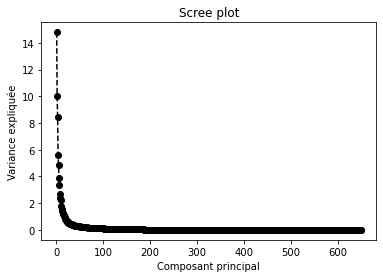

In [541]:
plt.plot(range(1,650),res['Prop.of Variance(%)'], linestyle='--',
              marker='o', color='black')
plt.ylabel("Variance expliquée")
plt.xlabel("Composant principal")
plt.title('Scree plot')

In [542]:
# entrainnons notre modele de PCA

pca = PCA(n_components = 77).fit(images_scaled)

images_pca = pca.transform(images_scaled)


In [543]:
# nouvelle base de donnee

images_pca = pd.DataFrame(images_pca)
images_pca.columns = ["C_"+str(i) for i in range(images_pca.shape[1])]
images_pca

,C_0,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,...,C_67,C_68,C_69,C_70,C_71,C_72,C_73,C_74,C_75,C_76
0,-10.789888,-14.213675,-2.735156,-2.498188,-1.183176,7.073886,-2.578135,2.312277,-1.390882,1.416821,...,0.944226,-2.048055,2.272576,0.214949,-1.078439,-0.415113,1.213471,-0.398336,-0.982787,1.044740
1,-8.028699,-13.080956,1.290162,-5.412125,-5.432770,7.034120,0.875677,2.191745,-3.159583,1.650780,...,0.045040,1.259810,-1.658292,0.469713,-0.433582,0.406599,1.357724,-1.380183,0.016457,0.858044
2,-11.853768,-12.371927,0.499792,-0.850676,-4.470024,3.152704,-6.133828,6.614749,-4.271631,-1.365931,...,-0.239488,1.397890,-0.874904,1.773692,0.937265,0.159044,1.897464,0.573498,-0.049001,-1.942483
3,-8.375311,-13.198684,-1.619159,-2.735668,-2.865611,2.760415,-1.289946,6.482926,-3.559026,0.848946,...,1.428331,-0.366788,0.293386,-1.594960,0.649157,0.924045,-0.787778,0.326545,-0.237221,0.666396
4,-11.084249,-10.571456,-0.975875,-6.273341,-2.338491,7.775180,1.280816,2.371517,-2.397269,-3.129159,...,1.381649,0.347256,-0.150186,-2.167710,-0.201856,-0.216492,0.196158,-2.135834,-0.398203,1.205753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.769067,-8.678745,10.233094,2.824471,0.664905,-1.597381,-4.232240,-4.575432,2.838324,-9.602685,...,0.952684,-1.806839,-0.570697,1.415269,1.907873,0.728257,0.311846,0.190889,0.154359,-1.328835
1996,9.284799,-8.809589,5.356709,0.754257,1.015119,2.737279,2.329659,0.712065,-4.390020,-4.844033,...,0.442707,1.422605,-1.310462,-1.647361,0.823024,1.872900,-1.711571,1.733830,-0.432829,-1.135449
1997,3.091136,-7.747077,7.407770,7.714628,-4.052805,2.220192,2.001649,-8.091696,-0.343375,-5.731122,...,1.223813,0.142040,1.625099,-1.337063,0.516342,0.205306,1.186299,-0.147575,-0.149601,1.079509
1998,0.014778,-8.773272,12.096583,1.365109,-4.050355,-1.909037,0.013554,-6.129999,-1.581119,-3.619974,...,-0.118539,0.429455,0.035546,0.998445,-0.017913,-0.683131,-0.046461,-0.131022,-1.588577,0.491834


### Une visualisation sur le plan forme par les deux premiers composants donne la figure ci-dessus

Text(0.5, 1.0, 'PCA projection')

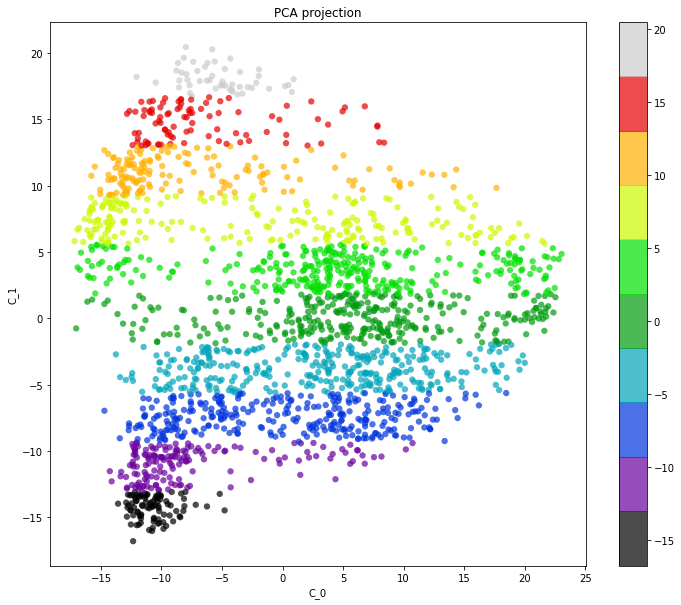

In [545]:
plt.figure(figsize=(12,10))
plt.scatter(images_pca['C_0'],images_pca['C_1'], c=images_pca['C_1'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.xlabel('C_0')
plt.ylabel('C_1')
plt.title('PCA projection')

In [ ]:
## Hierarchical Clustering

Text(0.5, 1.0, 'Dendogram')

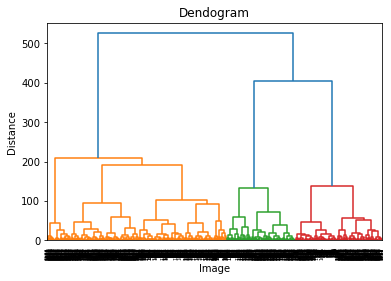

In [562]:
images_pca_new = images_pca.iloc[:,0:2:]
Z = linkage(images_pca_new, 'ward')
#Trace du dendrogramme
dendrogram(Z)
plt.xlabel('Image')
plt.ylabel('Distance')
plt.title('Dendogram')

## K Means Clustering

In [563]:
km_pca = KMeans(n_clusters=10, init = 'k-means++',random_state =42)
km_pca.fit(images_pca_new)

images_pca_new['cluster'] = km_pca.labels_
images_pca_new['segment'] =images_pca_new['cluster']


<ipython-input-563-ec45670fdf40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  images_pca_new['cluster'] = km_pca.labels_
<ipython-input-563-ec45670fdf40>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  images_pca_new['segment'] =images_pca_new['cluster']


Text(0.5, 1.0, 'Kmeans projection with k=10 using PCA')

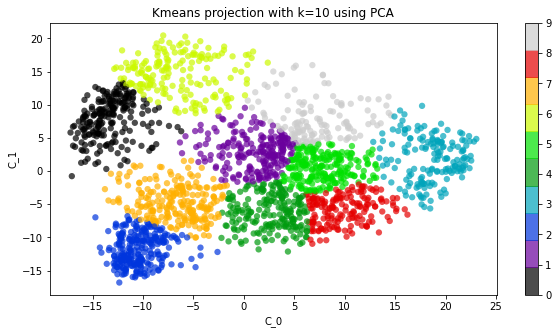

In [670]:
plt.figure(1,figsize=(10,5))
#plt.subplot(1,2,1)
plt.scatter(images_pca_new['C_0'],images_pca_new['C_1'], c=images_pca_new['cluster'], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.xlabel('C_0')
plt.ylabel('C_1')
plt.title('Kmeans projection with k=10 using PCA')

In [671]:
images_pca_new['cluster'].value_counts()

2    257
7    230
5    225
1    221
0    214
4    207
6    182
8    171
3    167
9    126
Name: cluster, dtype: int64

## Observations

>* Lorsqu'on fait de l'ACP sur la base de donnée globale, on obtient plus de 2 axes rendant la representation des nuages de points impossible.
>* Sachant que chaque chiffre (les images en réalité sont des chiffres allant de 0 a 9 écrit a la main) a une occurence de 200, une étude faite sur la base globale classe mieux ces différents chiffre dans les groupe par rapport a l'étude faite sur chaque base séparement.